<a href="https://colab.research.google.com/github/lambdabypi/AppliedGenAIIE5374/blob/main/M4_Lab2_GenAI_BeerGame_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

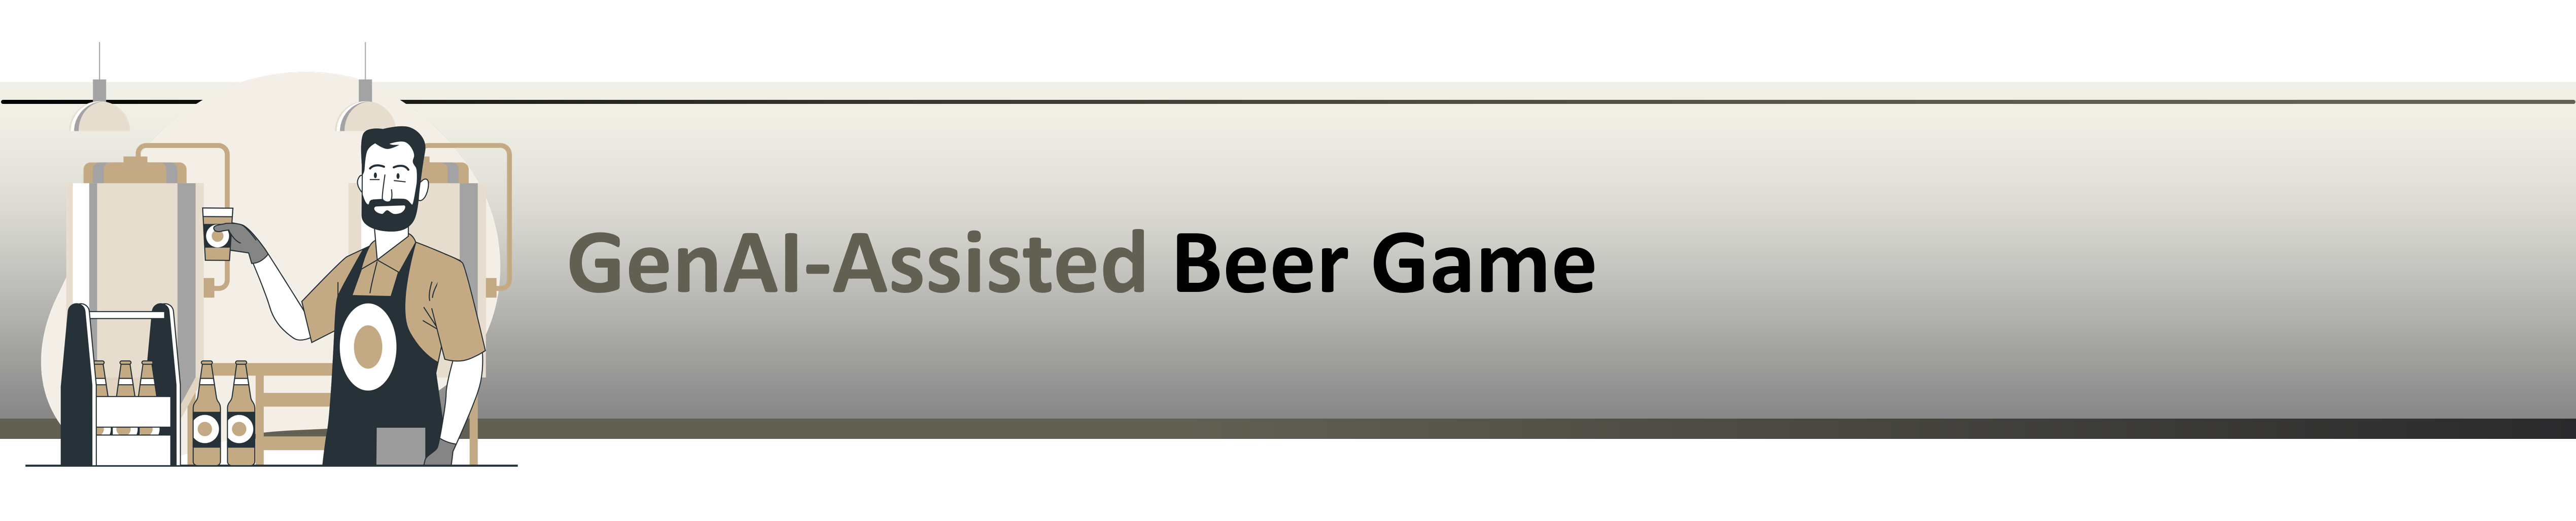

#  GenAI-Assisted Beer Game
- Applied Generative AI
- Author: Prof. Dehghani
## 🎯 **Aim of the Game**
The goal of the Beer Game simulation is to **understand and explore how Generative AI (GenAI)** can assist with supply chain modeling and optimization, specifically in the context of the Beer Game. By leveraging AI, participants can:
- Enhance decision-making processes.
- Analyze and reduce inefficiencies in supply chain systems.
- Improve outcomes with **better prompting**, **fine-tuning models**, and **strategic AI integration**.

---

## 🛠️ **Main Factors of the Beer Game**
The Beer Game simulates the complexities of a supply chain, focusing on key factors such as:
1. **Cost Management**:
   - Holding costs: Expenses for storing excess inventory.
   - Shortage costs: Penalties for running out of stock.
2. **Order Fulfillment**:
   - Balancing orders to meet customer demand without overstocking.
3. **Information Flow**:
   - Communication delays between supply chain levels (retailer, wholesaler, distributor, manufacturer).
4. **Lead Times**:
   - The delay between placing an order and receiving the shipment.

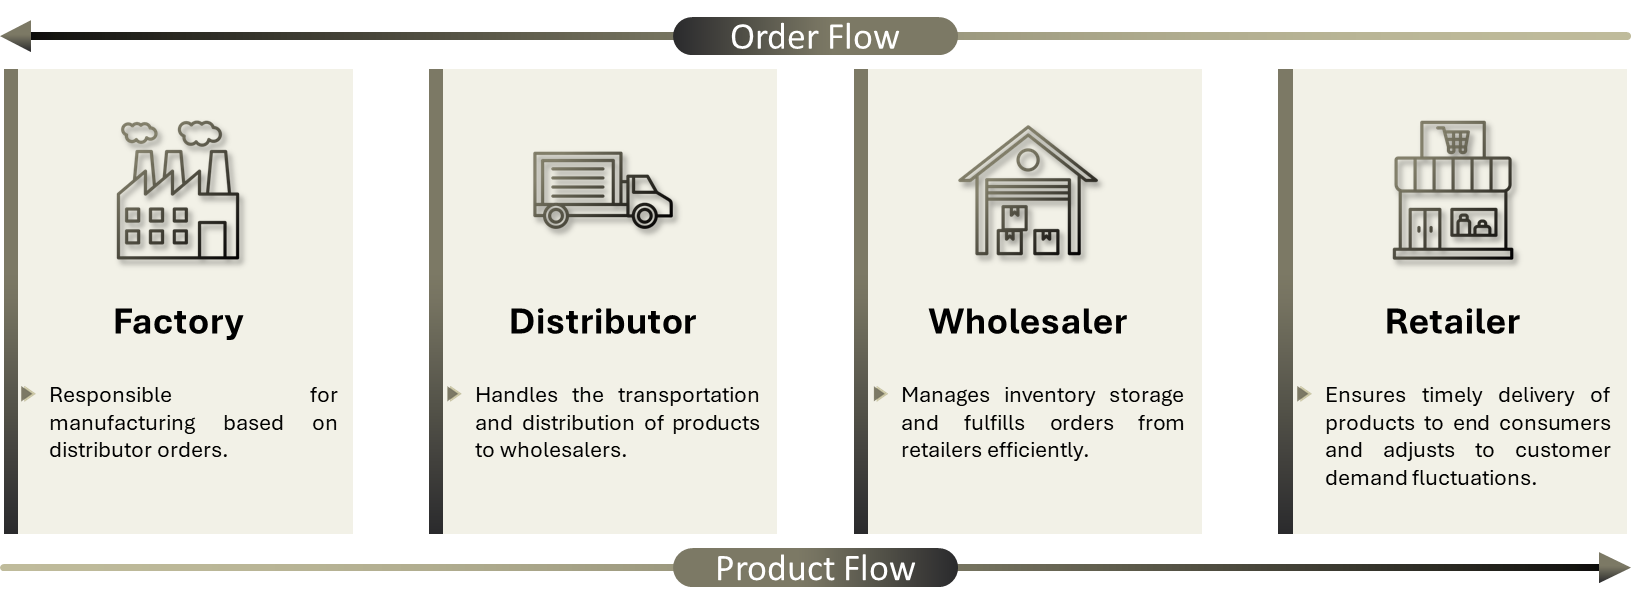
---

## 🌊 **The Bullwhip Effect**
The **Bullwhip Effect** refers to the amplification of demand variability as it moves upstream in a supply chain. Small fluctuations in customer demand at the retailer level can lead to:
- **Larger inventory swings** upstream (wholesalers, distributors, manufacturers).
- **Increased costs** due to overproduction or stockouts.
### 🌟 Key Causes of the Bullwhip Effect:
- Delayed information flow.
- Overreaction to demand changes.
- Batch ordering and infrequent restocking.

---

## 🎥 **Learn More**
To gain a deeper understanding of the Beer Game and its dynamics, watch this video:
[📹 Click Here to Watch the Beer Game Simulation](https://www.youtube.com/watch?v=0y6G7gow0a8)

---

By combining Generative AI with supply chain modeling, we can develop smarter strategies to reduce inefficiencies and improve the overall performance of the supply chain. Let's get started and explore how AI can revolutionize this classic simulation!


In [1]:

# ==================================================
# 📌 Essential Imports for Beer Game Simulation
# ==================================================

import re        # Regular expressions for text processing and pattern matching
import random    # Random number generation for simulation randomness
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Visualization and plotting
import requests  # HTTP requests to fetch data (e.g., API calls)
import ipywidgets as widgets  # Interactive widgets for creating UI elements
from IPython.display import display, HTML  # For displaying formatted HTML and widgets in Jupyter
import os        # Operating system interaction (e.g., file paths, environment variables)
from IPython.display import clear_output  # Import clear_output to fix the NameError
import openai    # OpenAI library for interacting with AI models (e.g., GPT APIs)


In [2]:
# 🔑 Configure API keys from Colab Secrets
from google.colab import userdata
import openai

# Secret names must be exactly 'OPENAI_API_KEY'
openai.api_key = userdata.get('OPENAI_API_KEY')

print("✅ API keys loaded successfully.")


✅ API keys loaded successfully.


In [17]:
# ==========================================================
# 🌟 OpenAI API Call Function for Beer Game Simulation
# ==========================================================
# This function facilitates calls to OpenAI's ChatGPT API to generate
# expert-level responses related to the Beer Game and supply chain modeling.
# Usage: Configure parameters like prompts, model, temperature, and max tokens.
# ==========================================================

from google.colab import userdata
from openai import OpenAI, AuthenticationError, OpenAIError

# 🔑 Load your OpenAI key from Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

# ⚠️ Pass the key when instantiating the client
client = OpenAI(api_key=api_key)

def call_ChatGPT(
    user_prompt: str,
    system_prompt: str = "You are a supply chain expert for the Beer Game.",
    model: str = "gpt-4-turbo",
    temperature: float = 0.7,
    max_tokens: int = 500
) -> str:
    """
    Calls OpenAI's ChatGPT API with configurable parameters.

    Parameters:
        user_prompt (str): Required. The user's input question or command.
        system_prompt (str): Optional. Context for the AI (default: Beer Game expert).
        model (str): Optional. OpenAI model to use (default: "gpt-4-turbo").
        temperature (float): Optional. Controls randomness (default: 0.7).
        max_tokens (int): Optional. Limits response length (default: 500).

    Returns:
        str: ChatGPT's response or an error message.
    """
    if not user_prompt:
        return "❌ Error: A user prompt is required."

    try:
        res = client.chat.completions.create(
            model=model,
            temperature=temperature,
            max_tokens=max_tokens,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user",   "content": user_prompt}
            ],
        )
        return res.choices[0].message.content

    except AuthenticationError:
        return "❌ Invalid API key. Please check your API credentials."
    except OpenAIError as e:
        return f"❌ OpenAI API error: {e}"
    except Exception as e:
        return f"❌ An unexpected error occurred: {e}"


# ==== Test the OpenAI Call Function ====
if __name__ == "__main__":
    test_prompt = "How does the Beer Game illustrate supply chain dynamics (5 words)?"
    print("🔹 ChatGPT Response:\n")
    print(call_ChatGPT(test_prompt))


🔹 ChatGPT Response:

Demonstrates lag, variability, communication, coordination.


In [18]:
# ==========================================================
# 🌟 Demand Variability Module
# ==========================================================
# This function models demand variability in the Beer Game simulation.
# It supports two types of demand patterns:
#   1. Market Fluctuation: Random uniform demand.
#   2. Seasonal Demand: Periodic cycles with randomness.
# Usage: Configure `demand_type` and optionally `period` for Seasonal Demand.
# ==========================================================

def define_demand_distribution(demand_type, period=None):
    """
    Generates demand directly based on the selected type.

    Parameters:
        - demand_type (str): The type of demand ('Market Fluctuation' or 'Seasonal Demand').
        - period (int, optional): The current period, required for 'Seasonal Demand'.

    Returns:
        - demand (int): The generated numeric demand value.
    """
    if demand_type == "Market Fluctuation":
        # Generate random demand using a uniform distribution
        return np.random.randint(9, 15)  # B = 12, V = 3

    elif demand_type == "Seasonal Demand":
        if period is None:
            raise ValueError("Period is required for Seasonal Demand.")

        # Generate demand following a 5-period cycle with randomness
        cycle_phase = period % 5
        seasonal_factors = [
            np.random.randint(-4, 0),  # Low
            np.random.randint(-2, 1),  # Medium
            np.random.randint(1, 2),   # High
            np.random.randint(3, 6),   # Peak
            np.random.randint(-2, 2)   # Medium again
        ]
        return max(5, min(20, 11 + seasonal_factors[cycle_phase]))  # Clamp demand between 5 and 20

    else:
        raise ValueError("Invalid demand type selected.")


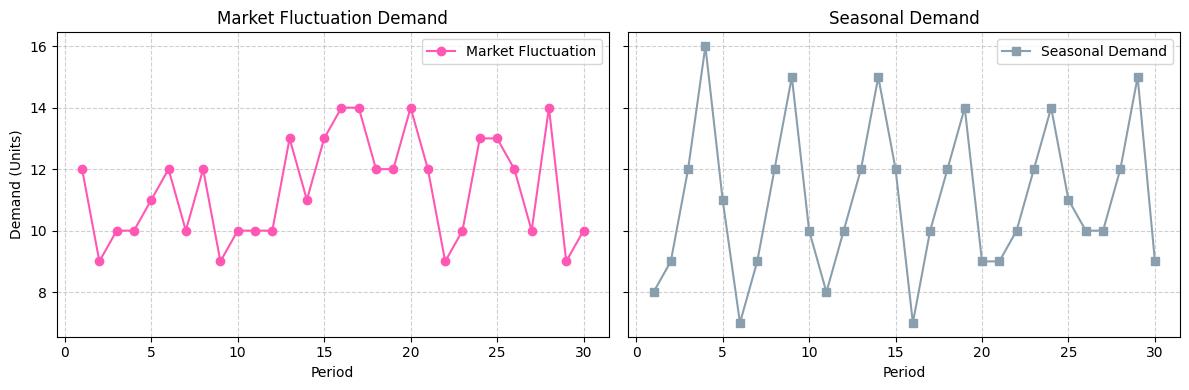

In [19]:
# ==========================================================
# 📊 Demand Simulation and Visualization
# ==========================================================
# This script simulates and plots demand over 30 periods for:
#   1. Market Fluctuation: Random variations in demand.
#   2. Seasonal Demand: Cyclical patterns with randomness.
# ==========================================================


# Number of periods for simulation
periods = 30

# Generate demand for 30 periods
market_demand = [define_demand_distribution("Market Fluctuation") for _ in range(periods)]
seasonal_demand = [define_demand_distribution("Seasonal Demand", p) for p in range(periods)]  # Pass period as positional

# ==== Plot Results Side by Side ====
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Market Fluctuation Demand Plot
axes[0].plot(range(1, periods + 1), market_demand, marker='o', linestyle='-', color='#FF57B3', label="Market Fluctuation")
axes[0].set_title("Market Fluctuation Demand")
axes[0].set_xlabel("Period")
axes[0].set_ylabel("Demand (Units)")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Seasonal Demand Plot
axes[1].plot(range(1, periods + 1), seasonal_demand, marker='s', linestyle='-', color='#8A9FAD', label="Seasonal Demand")
axes[1].set_title("Seasonal Demand")
axes[1].set_xlabel("Period")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()


In [20]:
# ==========================================================
# ⚙️ GenAI Order Quantity Optimization Module
# ==========================================================
# This function leverages Generative AI to calculate the optimal order quantity
# based on inventory, demand data, and cost considerations. It uses OpenAI's API
# to provide data-driven insights and justifications.
# Features:
#   - Integrates historical data for trend analysis.
#   - Balances holding and backorder costs for decision-making.
#   - Optionally returns detailed justifications for suggested orders.
# Usage: Pass inventory and cost data as parameters to receive optimal results.
# ==========================================================

def GenAI_Order_Quantity(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """
    Generates an optimal order quantity based on inventory and historical data.
    Uses OpenAI's API via the `call_ChatGPT` function for decision-making.

    Parameters:
        - table_part1 (DataFrame): Inventory-related data (last 3 weeks).
        - table_part2 (DataFrame): Demand, costs, and order data (last 3 weeks).
        - holding_cost (int): Cost per unit of holding inventory.
        - backorder_cost (int): Cost per unit of backorder.
        - justification (bool): Whether to return a justification.

    Returns:
        - order_quantity (int): Suggested order quantity.
        - justification_text (str): Explanation (if justification=True).
    """

    # Extract recent data summaries
    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):  # Limit to last 3 weeks
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]

        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    # Create the prompt for OpenAI
    prompt = (
        f"Based on the following recent inventory data:\n{trend_summary}\n"
        f"- Holding cost per unit: {holding_cost}\n"
        f"- Backorder cost per unit: {backorder_cost}\n\n"
        "Determine the optimal order quantity for next week.\n"
        "Use expected inventory calculations:\n"
        "Expected Inventory = Current Inventory - Expected Demand (which varies between 5 and 20) + Incoming Shipments.\n\n"
        "Suggest an order quantity that balances holding and backorder costs while ensuring optimal stock levels.\n\n"
        "Please provide your result explicitly in the following format with no additional text:\n"
        "'Suggest Order Quantity is: [your calculated quantity]'."
    )

    if justification:
        prompt += " Also, provide a short justification for your decision."

    # Call OpenAI API using the optimized function
    response_text = call_ChatGPT(prompt, system_prompt="You are an inventory optimization assistant.")

    # Extract order quantity from AI response
    match = re.search(r'\b\d+\b', response_text)
    order_quantity = int(match.group()) if match else None

    return order_quantity, (response_text if justification else None)


In [21]:
# ==========================================================
# 📦 Order Quantity Determination Module
# ==========================================================
# This function determines the optimal order quantity using one of the following approaches:
#   1. Manual: User manually inputs the order quantity.
#   2. GenAI-Assisted: AI suggests an order, and the user finalizes it.
#   3. Full Gen-AI: AI fully automates the decision-making process.
#   4. Average: Calculates the average demand based on historical data.
# Features:
#   - Supports multiple decision-making approaches.
#   - Balances holding and backorder costs dynamically.
#   - Provides justifications for AI-driven decisions.
# Usage: Select an approach and provide inventory data and cost parameters.
# ==========================================================

def get_order_quantity(approach, table_part1, table_part2, holding_cost, backorder_cost):
    """
    This function determines the order quantity based on the selected approach.
    It can either take manual input from the user, use a GenAI-assisted suggestion,
    fully automate the decision-making with GenAI, or calculate the average demand.

    Parameters:
    - approach: The approach used to determine the order quantity ('Manual', 'GenAI-Assisted', 'Full Gen-AI', 'Average').
    - table_part1: A part of the table with relevant inventory and shipment information.
    - table_part2: A part of the table with order quantity, demand, and cost data.
    - holding_cost: The cost of holding inventory for a given period.
    - backorder_cost: The cost incurred for not fulfilling an order on time.

    Returns:
    - order_quantity: The determined order quantity (either from user input, average calculation, or GenAI).
    - justification_text: A justification for the decision, if applicable.
    """

    # Print the approach in green every time the function is used
    print(f"Using approach: \033[92m{approach}\033[0m")  # Only the approach is colored green

    # Handle the 'average' approach
    if approach == 'average':
        # Calculate the average of non-null "Demand" values
        average_demand = table_part2['Demand'].dropna().mean()

        # If all demand values are null, generate a random integer between 8 and 12
        if pd.isna(average_demand):
            average_demand = random.randint(8, 12)
        else:
            # Convert the average to an integer
            average_demand = int(round(average_demand))

        print(f"Average Demand: {average_demand}")
        justification_text = "The order quantity was calculated as the average of non-null demand values or a random value if all were null."
        return average_demand, justification_text

    # Handle the 'Manual' approach
    elif approach == 'Manual':
        # If the approach is 'Manual', the user enters the order quantity
        order_quantity = int(input("Enter the order quantity manually: "))
        return order_quantity, None

    # Handle the 'GenAI-Assisted' or 'Full Gen-AI' approach
    elif approach == 'GenAI-Assisted' or approach == 'Full Gen-AI':
        # If the approach is 'GenAI-Assisted' or 'Full Gen-AI', GenAI provides a suggestion
        suggested_order, justification = GenAI_Order_Quantity(
            table_part1, table_part2, holding_cost, backorder_cost, justification=True
        )

        # Print the suggestion and justification
        print(f"AI Suggestion: {suggested_order}")
        print(f"Justification: {justification}")

        # Get the final order quantity from the user for GenAI-assisted approach
        if approach == 'GenAI-Assisted':
            order_quantity = int(input(f"Enter the final order quantity for {suggested_order}: "))
        else:
            # If the approach is 'Full Gen-AI', use the suggestion without modification
            order_quantity = suggested_order

        return order_quantity, justification

    else:
        # Raise an error if the provided approach is invalid
        raise ValueError("Invalid approach specified. Choose 'Manual', 'GenAI-Assisted', 'Full Gen-AI', or 'Average'.")


In [22]:
# ==========================================================
# 📦 Initial Inventory, Cost, and Supply Chain Parameters
# ==========================================================

# ---------- Initial Inventory Values for Each Role ----------
initial_inventories = {
    'Retailer': 10,
    'Wholesaler': 15,
    'Distributor': 20,
    'Factory': 25
}

# ---------- Cost Parameters ----------
holding_cost = 1            # Cost per unit of inventory held
backorder_cost = 2          # Cost per unit of backorder (penalty for unfilled demand)

# ---------- Lead Times ----------
lead_times = {
    'Retailer': 1,
    'Wholesaler': 2,
    'Distributor': 3,
    'Factory': 3
}

# ---------- Incoming Shipments ----------
incoming_shipments = {
    'Retailer': [(5, 1)],
    'Wholesaler': [(6, 1), (4, 2)],
    'Distributor': [(8, 1), (6, 2), (5, 3)],
    'Factory': [(10, 1), (8, 2), (7, 3)]
}

In [23]:
# ==========================================================
# 🎮 Beer Game Player Setup & Welcome Module
# ==========================================================
# This module manages player roles, demand settings, and game initialization.
# Features:
#   - Dynamically assigns roles to users and AI players.
#   - Generates a structured welcome message with user selections.
#   - Uses interactive widgets for user input.
#   - Provides a clean and engaging UI for game setup.
# Usage: The user selects their role and settings, and the game initializes dynamically.
# ==========================================================

# ---------- Seed for Reproducibility ----------
random.seed(42)  # Ensures AI assignments remain the same on reruns

def generate_welcome_message(role, demand_type, weeks, user_name, players, approach):
    """
    Displays a styled welcome message with user selections and player flow.
    """
    # 🎮 Clean & minimal emoji use for readability
    message = f"""
    <h2>Welcome, {user_name}! 🚀</h2>
    <p><b>Game Settings:</b></p>
    <ul>
        <li><b>Role:</b> {role}</li>
        <li><b>Demand Type:</b> {demand_type}</li>
        <li><b>Number of Weeks:</b> {weeks}</li>
        <li><b>Approach:</b> {approach}</li>
    </ul>
    <p><b>Players in the Game:</b></p>
    <p>{players}</p>
    <p>Let's begin!</p>
    """

    # Display the message
    display(HTML(message))


def generate_players(user_name, role):
    """
    Generates a list of players in the game, inserting the user into the correct role
    and assigning AI players to other roles.
    """
    # Define the fixed role order: Retailer -> Supplier -> Wholesaler -> Manufacturer
    fixed_roles = ['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer']

    # List of AI player names
    ai_names = ['AI-Retail', 'AI-Supply', 'AI-Wholesale', 'AI-Manufacture']

    players_flow = []  # List to store player roles and names

    for r in fixed_roles:
        if r == role:
            players_flow.append(f"<strong>{user_name}</strong> ({r})")  # Add the user
        else:
            ai_name = ai_names.pop(0)  # Assign AI names dynamically
            players_flow.append(f"<strong>{ai_name}</strong> ({r})")  # Assign AI

    return " ➡️ ".join(players_flow)  # Use arrow emoji for better visual clarity


# ---------- Define Input Widgets ----------
role_input = widgets.Dropdown(
    options=['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'],
    value='Retailer',
    description='Role:',
)

demand_input = widgets.Dropdown(
    options=['Market Fluctuation', 'Seasonal Demand'],
    value='Market Fluctuation',
    description='Demand:',
)

weeks_input = widgets.IntText(
    value=12,
    description='Weeks:',
    min=1,
)

name_input = widgets.Text(
    value='User',
    description='Your Name:',
)

approach_input = widgets.Dropdown(
    options=['Manual', 'GenAI-Assisted', 'Full Gen-AI'],
    value='Manual',
    description='Approach:',
)

start_button = widgets.Button(description="🚀 Start Game")


def on_start_button_click(b):
    """
    Handles the 'Start Game' button click, clears previous output, captures inputs, and displays the welcome message.
    """
    # Clear previous outputs to prevent stacking messages
    clear_output(wait=True)

    # Redisplay input widgets & button after clearing
    display(role_input, demand_input, weeks_input, name_input, approach_input, start_button)

    # Capture user inputs
    role = role_input.value
    demand_type = demand_input.value
    weeks = weeks_input.value
    user_name = name_input.value
    approach = approach_input.value

    # Generate players list
    players = generate_players(user_name, role)

    # Display the welcome message
    generate_welcome_message(role, demand_type, weeks, user_name, players, approach)

In [24]:
# ==========================================================
# 🔄 Supply Chain Simulation Table Generator
# ==========================================================
# This module generates a comprehensive supply chain table covering all roles:
#   - Retailer, Wholesaler, Distributor, and Factory.
# Features:
#   - Simulates inventory levels, order quantities, costs, and shipments.
#   - Supports different demand types and decision-making approaches.
#   - Provides detailed summaries with visualizations for tracking performance.
# Usage: Generates structured tables based on user-selected parameters.
# ==========================================================


# Main function to generate supply chain table for all roles based on the selected approach and parameters
def generate_supply_chain_table_for_all_roles(detailed_summary=False):
    """
    This function generates supply chain data for all roles (Retailer, Wholesaler, Distributor, Factory) over a
    specified number of weeks. The data includes inventory levels, order quantities, backorders, costs, and incoming shipments.

    Parameters:
    - detailed_summary: Boolean indicating if detailed weekly summaries should be displayed.

    Returns:
    - all_tables: A dictionary containing the generated data tables for each role.
    """

    # Get the values from the input widgets
    role_to_display = role_input.value  # Default to user-selected role from widget
    approach = approach_input.value  # Use approach from input widget
    weeks = weeks_input.value  # Use number of weeks from input widget
    demand_type = demand_input.value  # Use demand type from input widget

    all_tables = {}  # Initialize dictionary to store the tables for each role
    previous_orders = {}  # Dictionary to track order quantities for each role
    previous_orders["Retailer"] = define_demand_distribution(demand_type, period=0)  # Initial customer demand for Retailer

    previous_role = None  # Initialize previous_role to None for loop

    # Iterate through each role in order: Retailer -> Wholesaler -> Distributor -> Factory
    for role in ["Retailer", "Wholesaler", "Distributor", "Factory"]:
        data = []  # List to store data for the current role
        inventory = initial_inventories[role]  # Initial inventory for the role
        backorder = 0  # Backorder for the role, initialized to 0
        cumulative_total_cost = 0  # Cumulative total cost, initialized to 0
        incoming_shippings = incoming_shipments[role]  # Incoming shipments for the role

        # Add Week 0 as the initial setup week
        data.append({
            "Week": 0,
            "Role": role,
            "Inventory": inventory,
            "Incoming Shipping": incoming_shippings.copy(),
            "Order Quantity": None,
            "Demand": None,
            "Excess Inventory": None,
            "Backorder": None,
            "Holding Cost": None,
            "Backorder Cost": None,
            "Total Cost": cumulative_total_cost
        })

        # Loop over each week (from 1 to the number of weeks specified by the user)
        for i in range(1, weeks + 1):
            # Set demand based on the role's type of demand
            if role == "Retailer":
                demand = define_demand_distribution(demand_type, i)  # Generate customer demand for Retailer
            else:
                # Get demand from the Order Quantity of the previous role’s table_part2 for the same week
                demand = all_tables[previous_role][1].loc[
                    all_tables[previous_role][1]['Week'] == i, 'Order Quantity'
                ].values[0]

            # Process incoming shipments that have arrived this week
            arrived_shipments = [shipment[0] for shipment in incoming_shippings if shipment[1] == i]
            arrived_shipments = [shipment for shipment in arrived_shipments if shipment is not None]  # Remove None values
            total_arrived = sum(arrived_shipments)  # Calculate total arrived shipments for the week
            incoming_shippings = [shipment for shipment in incoming_shippings if shipment[1] != i]

            # Generate the order quantity based on the selected approach (Manual, GenAI-Assisted, or Full Gen-AI)
            temp_table_part1 = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]]
            temp_table_part2 = pd.DataFrame(data)[[
                "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                "Holding Cost", "Backorder Cost", "Total Cost"
            ]]

            if detailed_summary and role == role_to_display:
                # Clear the output of the current cell
                clear_output(wait=True)
                separator = "=" * 40  # Separator for visibility
                week_text = f"{i}"

                # Display the separator and centered "Week {i}" text in purple color using HTML
                display(HTML(f"<h3 style='text-align:center; color: purple;'>{week_text.center(len(separator))}</h3>"))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Display summary and detailed data for the current week in a table
                summary_df = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]].head(i + 1)
                detailed_df = pd.DataFrame(data)[[
                    "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                    "Holding Cost", "Backorder Cost", "Total Cost"
                ]].head(i)

                # Merge both DataFrames on "Week" and display the combined table as HTML
                combined_df = pd.merge(summary_df, detailed_df, on=["Week", "Role"], how="outer")
                display(HTML(combined_df.to_html(index=False)))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Plotting the order and demand for the current role
                plt.figure(figsize=(10, 4))
                plt.plot(combined_df['Week'], combined_df['Order Quantity'], label="Order Quantity",
                         marker='o', linestyle='-', color='blue')
                plt.plot(combined_df['Week'], combined_df['Demand'], label="Demand",
                         marker='x', linestyle='--', color='red')
                plt.title(f"Order Quantity vs Demand for {role} (Week {i})", fontsize=14)
                plt.xlabel("Week", fontsize=12)
                plt.ylabel("Quantity", fontsize=12)
                plt.legend(loc='lower right')
                plt.grid(True, which='both', axis='y')  # Only show horizontal grid lines
                plt.xticks(ticks=combined_df['Week'], labels=[f"Week {x}" for x in combined_df['Week']], rotation=45)
                plt.ylim(bottom=0)  # Set the y-axis to start from 0
                # Handle NaN values by using 'fillna' with 0 before calculating the maximum
                max_y = int(combined_df[['Order Quantity', 'Demand']].fillna(0).max().max()) + 4
                plt.yticks(range(0, max_y, 1))  # Show integer ticks from 0 to max_y
                plt.show()

            # Check if the current role is the selected role
            if role == role_to_display:
                # Use the selected approach for the displayed role
                order_quantity, justification_text = get_order_quantity(
                    approach, temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )
            else:
                # For other roles, use the "average" approach
                order_quantity, justification_text = get_order_quantity(
                    "average", temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )

            # Calculate inventory and backorder after demand fulfillment
            net_inventory = inventory - demand + total_arrived
            excess_inventory = max(0, net_inventory)  # Ensure no negative excess inventory
            backorder = abs(min(0, net_inventory))  # Calculate backorder if inventory is negative

            # Calculate holding cost, backorder cost, and weekly total cost
            holding_cost_week = excess_inventory * holding_cost
            backorder_cost_week = backorder * backorder_cost
            weekly_total_cost = holding_cost_week + backorder_cost_week
            cumulative_total_cost += weekly_total_cost  # Update the cumulative total cost

            # Schedule new incoming shipment for the next week based on lead times
            incoming_shippings.append((order_quantity, i + lead_times[role]))

            # Append weekly data to the table
            data.append({
                "Week": i,
                "Role": role,
                "Inventory": inventory,
                "Incoming Shipping": incoming_shippings.copy(),
                "Order Quantity": order_quantity,
                "Demand": demand,
                "Excess Inventory": excess_inventory,
                "Backorder": backorder,
                "Holding Cost": holding_cost_week,
                "Backorder Cost": backorder_cost_week,
                "Total Cost": cumulative_total_cost
            })

            # Update inventory for next week based on excess inventory
            inventory = excess_inventory
            previous_orders[role] = order_quantity  # Store this role's order quantity for the next role

        # Convert the final data into a DataFrame for this role
        full_table = pd.DataFrame(data)
        table_part1 = full_table[["Week", "Role", "Inventory", "Incoming Shipping"]]
        table_part2 = full_table[[
            "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
            "Holding Cost", "Backorder Cost", "Total Cost"
        ]]

        # Store the tables for this role
        all_tables[role] = (table_part1, table_part2)

        # Update previous_role for the next role in the iteration
        previous_role = role

    # Display tables based on role_to_display parameter
    if role_to_display == "All":
        for role, tables in all_tables.items():
            table_part1, table_part2 = tables
            display(HTML(f"<h3>Final Part 1 for {role}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
    else:
        # Display only the specified role's tables
        if role_to_display in all_tables:
            table_part1, table_part2 = all_tables[role_to_display]
            display(HTML(f"<h3>Final Part 1 for {role_to_display}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role_to_display}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
        else:
            print(f"Role '{role_to_display}' not found in the supply chain roles.")

    return all_tables


In [25]:
# ==========================================================
# 🎮 Game Initialization & User Input Handling
# ==========================================================

# Set the button click event handler
start_button.on_click(on_start_button_click)

# Display the input widgets
display(role_input, demand_input, weeks_input, name_input, approach_input, start_button)

Dropdown(description='Role:', options=('Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'), value='Retailer'…

Dropdown(description='Demand:', options=('Market Fluctuation', 'Seasonal Demand'), value='Market Fluctuation')

IntText(value=10, description='Weeks:')

Text(value='Shreyas', description='Your Name:')

Dropdown(description='Approach:', index=2, options=('Manual', 'GenAI-Assisted', 'Full Gen-AI'), value='Full Ge…

Button(description='🚀 Start Game', style=ButtonStyle())

Week,Role,Inventory,Incoming Shipping,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,10,"[(5, 1)]",NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10,"[(10, 2)]",10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,4,"[(1, 3)]",1.0,9.0,5.0,0.0,5.0,0.0,9
3,Retailer,5,"[(2, 4)]",2.0,13.0,0.0,7.0,0.0,14.0,23
4,Retailer,0,"[(2, 5)]",2.0,11.0,0.0,9.0,0.0,18.0,41
5,Retailer,0,"[(1, 6)]",1.0,12.0,0.0,10.0,0.0,20.0,61
6,Retailer,0,"[(3, 7)]",3.0,13.0,0.0,12.0,0.0,24.0,85
7,Retailer,0,"[(1, 8)]",1.0,9.0,0.0,6.0,0.0,12.0,97
8,Retailer,0,"[(3, 9)]",3.0,9.0,0.0,8.0,0.0,16.0,113
9,Retailer,0,"[(0, 10)]",0.0,13.0,0.0,10.0,0.0,20.0,133


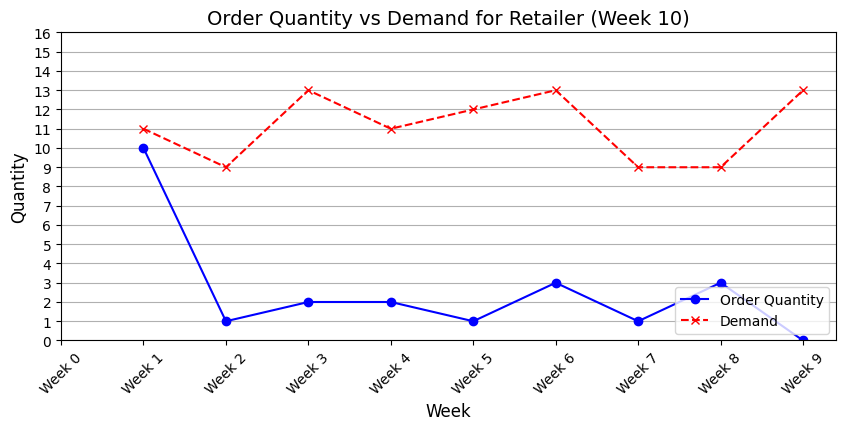

Using approach: Full Gen-AI
AI Suggestion: 3
Justification: To determine the optimal order quantity, we need to consider the expected inventory for the coming week and balance the costs associated with holding excess inventory and incurring backorders.

### Week 3 Data:
- **Current Inventory**: 4 units
- **Incoming Shipments**: 1 unit (arriving in Week 3)
- **Expected Demand**: varies between 5 and 20 units

### Calculations:
1. **Expected Inventory without additional order**:
   \[ Expected Inventory = Current Inventory + Incoming Shipments - Expected Demand \]
   \[ Expected Inventory = 4 + 1 - \text{[5 to 20]} = 5 - \text{[5 to 20]} \]
   \[ Expected Inventory ranges from 0 to -15 \]

   If we order X units, the Expected Inventory becomes:
   \[ Expected Inventory = 5 + X - \text{[5 to 20]} \]
   \[ Expected Inventory ranges from X to X - 15 \]

2. **Balancing Costs**:
   - **Holding Cost** is 1 per excess unit.
   - **Backorder Cost** is 2 per unit short.

   To minimize costs, we 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(1, 3)]"
3,Retailer,5,"[(2, 4)]"
4,Retailer,0,"[(2, 5)]"
5,Retailer,0,"[(1, 6)]"
6,Retailer,0,"[(3, 7)]"
7,Retailer,0,"[(1, 8)]"
8,Retailer,0,"[(3, 9)]"
9,Retailer,0,"[(0, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,1.0,9.0,5.0,0.0,5.0,0.0,9
3,Retailer,2.0,13.0,0.0,7.0,0.0,14.0,23
4,Retailer,2.0,11.0,0.0,9.0,0.0,18.0,41
5,Retailer,1.0,12.0,0.0,10.0,0.0,20.0,61
6,Retailer,3.0,13.0,0.0,12.0,0.0,24.0,85
7,Retailer,1.0,9.0,0.0,6.0,0.0,12.0,97
8,Retailer,3.0,9.0,0.0,8.0,0.0,16.0,113
9,Retailer,0.0,13.0,0.0,10.0,0.0,20.0,133


In [26]:
# Generate and display the supply chain tables for all roles with detailed summary
all_tables = generate_supply_chain_table_for_all_roles(detailed_summary=True)

In [27]:
# ==========================================================
# 📂 Save & Download Retailer Table
# ==========================================================
# Exports the Retailer table with user details and timestamps.
# Saves as CSV and triggers download in Google Colab.
# ==========================================================

from google.colab import files
import time
import pytz
from datetime import datetime

# Assuming `all_tables` is a dictionary and you want the "Retailer" table
retailer_table = pd.concat(all_tables["Retailer"], axis=1)  # Combine table_part1 and table_part2 for Retailer

# Add 'username' and 'approach' columns
retailer_table['username'] = name_input.value  # Add username column
retailer_table['approach'] = approach_input.value  # Add approach column

# Get the current time in EST
est = pytz.timezone('US/Eastern')
current_time_est = datetime.now(est).strftime("Time:%H-%M-%S")  # Format time as HH-MM-SS in EST

# Generate the file name using name_input, approach_input, and EST time
file_name = f"{name_input.value}_{approach_input.value}_{current_time_est}_retailer_table.csv"

# Save the Retailer table to a CSV file
retailer_table.to_csv(file_name, index=False)

# Download the file
files.download(file_name)
print(f"Retailer table saved and ready for download: {file_name}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Retailer table saved and ready for download: Shreyas_Full Gen-AI_Time:17-09-06_retailer_table.csv


In [14]:
def display_congratulations(input_user):
    message = f"""
    🎉✨ <h2 style='color:green;'>Congratulations, {input_user}! 🎉</h2> ✨
    <p style='font-size:16px;'>You have successfully completed this lab. Great job! 🚀</p>
    <p style='font-weight:bold;'>- Prof. Dehghani</p>
    """
    from IPython.display import display, HTML
    display(HTML(message))

# Example Usage
display_congratulations(name_input)


# Part 1: Prompt Engineering & Model Performance (Max: 2-page Report)
1. Set the model approach to **FullGenAI** and experiment with different prompting strategies to analyze their impact on performance.
2. Try at multiple distinct prompts to see if prompting can improve the results. Experiment with different approaches, such as:
    - **Trying multiple ChatGPT models** to compare reasoning quality.
    - **Reframing the prompt** to adjust structure and clarity.
    - **Iterating with slight variations** to refine responses and optimize output.

**Report only your top 3 best outcomes**, highlighting key insights from each approach.

3. For each selected prompt:
    - Run the model for 5 iterations and report the Total Cost for all iterations.
    - Summarize the results in a table.
    - Provide one graph per prompt showcasing the results.
4. Set the simulation duration to **10 weeks**.
5. This can be done in **groups** for discussion, but **each student must submit an individual report.**


In [45]:
# ==========================================================
# 🔄 Supply Chain Simulation Table Generator
# ==========================================================
# This module generates a comprehensive supply chain table covering all roles:
#   - Retailer, Wholesaler, Distributor, and Factory.
# Features:
#   - Simulates inventory levels, order quantities, costs, and shipments.
#   - Supports different demand types and decision-making approaches.
#   - Provides detailed summaries with visualizations for tracking performance.
# Usage: Generates structured tables based on user-selected parameters.
# ==========================================================


# Main function to generate supply chain table for all roles based on the selected approach and parameters
def generate_supply_chain_table_for_all_roles(detailed_summary=False):
    """
    This function generates supply chain data for all roles (Retailer, Wholesaler, Distributor, Factory) over a
    specified number of weeks. The data includes inventory levels, order quantities, backorders, costs, and incoming shipments.

    Parameters:
    - detailed_summary: Boolean indicating if detailed weekly summaries should be displayed.

    Returns:
    - all_tables: A dictionary containing the generated data tables for each role.
    """

    # Get the values from the input widgets
    role_to_display = role_input.value  # Default to user-selected role from widget
    approach = approach_input.value  # Use approach from input widget
    weeks = weeks_input.value  # Use number of weeks from input widget
    demand_type = demand_input.value  # Use demand type from input widget

    all_tables = {}  # Initialize dictionary to store the tables for each role
    previous_orders = {}  # Dictionary to track order quantities for each role
    previous_orders["Retailer"] = define_demand_distribution(demand_type, period=0)  # Initial customer demand for Retailer

    previous_role = None  # Initialize previous_role to None for loop

    # Iterate through each role in order: Retailer -> Wholesaler -> Distributor -> Factory
    for role in ["Retailer", "Wholesaler", "Distributor", "Factory"]:
        data = []  # List to store data for the current role
        inventory = initial_inventories[role]  # Initial inventory for the role
        backorder = 0  # Backorder for the role, initialized to 0
        cumulative_total_cost = 0  # Cumulative total cost, initialized to 0
        incoming_shippings = incoming_shipments[role]  # Incoming shipments for the role

        # Add Week 0 as the initial setup week
        data.append({
            "Week": 0,
            "Role": role,
            "Inventory": inventory,
            "Incoming Shipping": incoming_shippings.copy(),
            "Order Quantity": None,
            "Demand": None,
            "Excess Inventory": None,
            "Backorder": None,
            "Holding Cost": None,
            "Backorder Cost": None,
            "Total Cost": cumulative_total_cost
        })

        # Loop over each week (from 1 to the number of weeks specified by the user)
        for i in range(1, weeks + 1):
            # Set demand based on the role's type of demand
            if role == "Retailer":
                demand = define_demand_distribution(demand_type, i)  # Generate customer demand for Retailer
            else:
                # Get demand from the Order Quantity of the previous role’s table_part2 for the same week
                demand = all_tables[previous_role][1].loc[
                    all_tables[previous_role][1]['Week'] == i, 'Order Quantity'
                ].values[0]

            # Process incoming shipments that have arrived this week
            arrived_shipments = [shipment[0] for shipment in incoming_shippings if shipment[1] == i]
            arrived_shipments = [shipment for shipment in arrived_shipments if shipment is not None]  # Remove None values
            total_arrived = sum(arrived_shipments)  # Calculate total arrived shipments for the week
            incoming_shippings = [shipment for shipment in incoming_shippings if shipment[1] != i]

            # Generate the order quantity based on the selected approach (Manual, GenAI-Assisted, or Full Gen-AI)
            temp_table_part1 = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]]
            temp_table_part2 = pd.DataFrame(data)[[
                "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                "Holding Cost", "Backorder Cost", "Total Cost"
            ]]

            if detailed_summary and role == role_to_display:
                # Clear the output of the current cell
                clear_output(wait=True)
                separator = "=" * 40  # Separator for visibility
                week_text = f"{i}"

                # Display the separator and centered "Week {i}" text in purple color using HTML
                display(HTML(f"<h3 style='text-align:center; color: purple;'>{week_text.center(len(separator))}</h3>"))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Display summary and detailed data for the current week in a table
                summary_df = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]].head(i + 1)
                detailed_df = pd.DataFrame(data)[[
                    "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                    "Holding Cost", "Backorder Cost", "Total Cost"
                ]].head(i)

                # Merge both DataFrames on "Week" and display the combined table as HTML
                combined_df = pd.merge(summary_df, detailed_df, on=["Week", "Role"], how="outer")
                display(HTML(combined_df.to_html(index=False)))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Plotting the order and demand for the current role
                plt.figure(figsize=(10, 4))
                plt.plot(combined_df['Week'], combined_df['Order Quantity'], label="Order Quantity",
                         marker='o', linestyle='-', color='blue')
                plt.plot(combined_df['Week'], combined_df['Demand'], label="Demand",
                         marker='x', linestyle='--', color='red')
                plt.title(f"Order Quantity vs Demand for {role} (Week {i})", fontsize=14)
                plt.xlabel("Week", fontsize=12)
                plt.ylabel("Quantity", fontsize=12)
                plt.legend(loc='lower right')
                plt.grid(True, which='both', axis='y')  # Only show horizontal grid lines
                plt.xticks(ticks=combined_df['Week'], labels=[f"Week {x}" for x in combined_df['Week']], rotation=45)
                plt.ylim(bottom=0)  # Set the y-axis to start from 0
                # Handle NaN values by using 'fillna' with 0 before calculating the maximum
                max_y = int(combined_df[['Order Quantity', 'Demand']].fillna(0).max().max()) + 4
                plt.yticks(range(0, max_y, 1))  # Show integer ticks from 0 to max_y
                plt.show()

            # Check if the current role is the selected role
            if role == get_mapped_role(role_to_display):
                # Use the selected approach for the displayed role
                order_quantity, justification_text = get_order_quantity(
                    approach, temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )
            else:
                # For other roles, use the "average" approach
                order_quantity, justification_text = get_order_quantity(
                    "average", temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )

            # Calculate inventory and backorder after demand fulfillment
            net_inventory = inventory - demand + total_arrived
            excess_inventory = max(0, net_inventory)  # Ensure no negative excess inventory
            backorder = abs(min(0, net_inventory))  # Calculate backorder if inventory is negative

            # Calculate holding cost, backorder cost, and weekly total cost
            holding_cost_week = excess_inventory * holding_cost
            backorder_cost_week = backorder * backorder_cost
            weekly_total_cost = holding_cost_week + backorder_cost_week
            cumulative_total_cost += weekly_total_cost  # Update the cumulative total cost

            # Schedule new incoming shipment for the next week based on lead times
            incoming_shippings.append((order_quantity, i + lead_times[role]))

            # Append weekly data to the table
            data.append({
                "Week": i,
                "Role": role,
                "Inventory": inventory,
                "Incoming Shipping": incoming_shippings.copy(),
                "Order Quantity": order_quantity,
                "Demand": demand,
                "Excess Inventory": excess_inventory,
                "Backorder": backorder,
                "Holding Cost": holding_cost_week,
                "Backorder Cost": backorder_cost_week,
                "Total Cost": cumulative_total_cost
            })

            # Update inventory for next week based on excess inventory
            inventory = excess_inventory
            previous_orders[role] = order_quantity  # Store this role's order quantity for the next role

        # Convert the final data into a DataFrame for this role
        full_table = pd.DataFrame(data)
        table_part1 = full_table[["Week", "Role", "Inventory", "Incoming Shipping"]]
        table_part2 = full_table[[
            "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
            "Holding Cost", "Backorder Cost", "Total Cost"
        ]]

        # Store the tables for this role
        all_tables[role] = (table_part1, table_part2)

        # Update previous_role for the next role in the iteration
        previous_role = role

    # Display tables based on role_to_display parameter
    if role_to_display == "All":
        for role, tables in all_tables.items():
            table_part1, table_part2 = tables
            display(HTML(f"<h3>Final Part 1 for {role}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
    else:
        # Display only the specified role's tables
        if role_to_display in all_tables:
            table_part1, table_part2 = all_tables[role_to_display]
            display(HTML(f"<h3>Final Part 1 for {role_to_display}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role_to_display}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
        else:
            print(f"Role '{role_to_display}' not found in the supply chain roles.")

    return all_tables


In [46]:
# ==========================================================
# 🤖 Multi-Model Comparison Framework for Beer Game
# ==========================================================
# This module adds support for testing different OpenAI models
# as part of the prompt engineering strategies
# ==========================================================

# Global variables to control model and strategy
CURRENT_STRATEGY = "original"
CURRENT_MODEL = "gpt-4-turbo"

def set_model_and_strategy(strategy_name, model_name="gpt-4-turbo"):
    """
    Sets both the prompting strategy and the model to use

    Parameters:
    - strategy_name: "original", "mathematical", "behavioral", "ml_pattern"
    - model_name: "gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"
    """
    global CURRENT_STRATEGY, CURRENT_MODEL
    CURRENT_STRATEGY = strategy_name
    CURRENT_MODEL = model_name
    print(f"🎯 Strategy: {strategy_name} | Model: {model_name}")

def GenAI_Order_Quantity_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """
    Enhanced GenAI function that uses both different strategies AND different models
    """
    global CURRENT_STRATEGY, CURRENT_MODEL

    # Route to appropriate strategy with current model
    if CURRENT_STRATEGY == "mathematical":
        return GenAI_Mathematical_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    elif CURRENT_STRATEGY == "behavioral":
        return GenAI_Behavioral_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    elif CURRENT_STRATEGY == "ml_pattern":
        return GenAI_ML_Pattern_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    else:
        return GenAI_Original_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)

def GenAI_Original_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Original strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"Based on the following recent inventory data:\n{trend_summary}\n"
        f"- Holding cost per unit: {holding_cost}\n"
        f"- Backorder cost per unit: {backorder_cost}\n\n"
        "Determine the optimal order quantity for next week.\n"
        "Use expected inventory calculations:\n"
        "Expected Inventory = Current Inventory - Expected Demand (which varies between 5 and 20) + Incoming Shipments.\n\n"
        "Suggest an order quantity that balances holding and backorder costs while ensuring optimal stock levels.\n\n"
        "Please provide your result explicitly in the following format with no additional text:\n"
        "'Suggest Order Quantity is: [your calculated quantity]'."
    )

    if justification:
        prompt += " Also, provide a short justification for your decision."

    # Use the current model
    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an inventory optimization assistant.",
                                model=CURRENT_MODEL,
                                temperature=0.7,
                                max_tokens=500)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_Mathematical_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Mathematical strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"You are a supply chain optimization expert specializing in Economic Order Quantity (EOQ) models.\n\n"
        f"HISTORICAL DATA:\n{trend_summary}\n"
        f"COST PARAMETERS:\n"
        f"- Holding cost per unit per week: ${holding_cost}\n"
        f"- Backorder cost per unit per week: ${backorder_cost}\n\n"
        f"MATHEMATICAL CONSTRAINTS:\n"
        f"- Expected demand range: 5-20 units per week\n"
        f"- Current inventory level: {table_part1.iloc[-1]['Inventory'] if len(table_part1) > 0 else 0}\n"
        f"- Lead time: 1 week\n\n"
        f"OPTIMIZATION OBJECTIVE:\n"
        f"Minimize total cost = (Holding Cost × Excess Inventory) + (Backorder Cost × Shortage)\n\n"
        f"Calculate the mathematically optimal order quantity using:\n"
        f"1. Historical demand trend analysis\n"
        f"2. Safety stock calculations\n"
        f"3. Cost-benefit analysis of different order quantities\n"
        f"4. Risk assessment for stockouts vs. overstocking\n\n"
        f"Provide your calculation and result in this exact format:\n"
        f"'Suggest Order Quantity is: [calculated_quantity]'"
    )

    if justification:
        prompt += "\n\nAlso provide a detailed mathematical justification showing your calculations."

    # Model-specific parameters
    temperature = 0.2 if "gpt-4" in CURRENT_MODEL else 0.3
    max_tokens = 700 if "gpt-4" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are a quantitative supply chain analyst with expertise in inventory optimization mathematics.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_Behavioral_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Behavioral strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"You are a seasoned supply chain manager dealing with the Beer Game simulation, known for creating the 'bullwhip effect'.\n\n"
        f"CURRENT SITUATION:\n{trend_summary}\n"
        f"BUSINESS COSTS:\n"
        f"- Inventory holding cost: ${holding_cost}/unit/week (storage, insurance, obsolescence)\n"
        f"- Stockout penalty: ${backorder_cost}/unit/week (lost sales, customer dissatisfaction)\n\n"
        f"CRITICAL CONSIDERATIONS:\n"
        f"- The bullwhip effect amplifies demand variability upstream\n"
        f"- Customer demand is unpredictable (5-20 units weekly)\n"
        f"- Lead times create planning challenges\n"
        f"- Stockouts are {backorder_cost}x more expensive than holding inventory\n\n"
        f"DECISION FRAMEWORK:\n"
        f"As an experienced manager, you must balance:\n"
        f"1. Risk of customer service failures (stockouts)\n"
        f"2. Working capital efficiency (excess inventory)\n"
        f"3. Demand uncertainty and forecasting errors\n"
        f"4. Supply chain resilience and safety buffers\n\n"
        f"Given the recent performance trends and cost structure, what order quantity would you recommend to:\n"
        f"- Maintain high customer service levels\n"
        f"- Minimize total supply chain costs\n"
        f"- Buffer against demand uncertainty\n\n"
        f"Provide your recommendation in this format:\n"
        f"'Suggest Order Quantity is: [your_recommendation]'"
    )

    if justification:
        prompt += "\n\nExplain your reasoning from a risk management and business continuity perspective."

    # Model-specific parameters - behavioral strategy benefits from higher creativity
    temperature = 0.8 if "gpt-3.5" in CURRENT_MODEL else 0.7
    max_tokens = 500 if "gpt-3.5" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an experienced supply chain manager who understands both quantitative analysis and behavioral factors in inventory decisions.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_ML_Pattern_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """ML Pattern strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Historical Performance Analysis:\n"

    recent_demands = []
    recent_orders = []
    recent_costs = []

    for week in range(min(3, len(table_part2))):
        if week < len(table_part2):
            week_data_1 = table_part1.iloc[week]
            week_data_2 = table_part2.iloc[week]

            if pd.notna(week_data_2['Demand']):
                recent_demands.append(week_data_2['Demand'])
            if pd.notna(week_data_2['Order Quantity']):
                recent_orders.append(week_data_2['Order Quantity'])
            if pd.notna(week_data_2['Total Cost']):
                recent_costs.append(week_data_2['Total Cost'])

            trend_summary += (
                f"Week {week_data_1['Week']}: "
                f"Inventory={week_data_1['Inventory']}, "
                f"Orders={week_data_2['Order Quantity']}, "
                f"Demand={week_data_2['Demand']}, "
                f"Cost=${week_data_2['Total Cost']}\n"
            )

    avg_demand = sum(recent_demands) / len(recent_demands) if recent_demands else 12
    demand_volatility = max(recent_demands) - min(recent_demands) if len(recent_demands) > 1 else 5
    cost_trend = "increasing" if len(recent_costs) > 1 and recent_costs[-1] > recent_costs[0] else "stable"

    prompt = (
        f"You are an AI-powered inventory optimization system using advanced pattern recognition.\n\n"
        f"PERFORMANCE DATA ANALYSIS:\n{trend_summary}\n"
        f"CALCULATED METRICS:\n"
        f"- Average recent demand: {avg_demand:.1f} units\n"
        f"- Demand volatility range: {demand_volatility} units\n"
        f"- Cost trend: {cost_trend}\n"
        f"- Holding cost coefficient: {holding_cost}\n"
        f"- Backorder penalty coefficient: {backorder_cost}\n\n"
        f"PATTERN RECOGNITION INPUTS:\n"
        f"- Demand follows stochastic process (5-20 unit range)\n"
        f"- Historical demand pattern: {recent_demands}\n"
        f"- Previous order pattern: {recent_orders}\n"
        f"- Cost performance trend: {recent_costs}\n\n"
        f"ALGORITHM REQUIREMENTS:\n"
        f"Using advanced forecasting and optimization techniques:\n"
        f"1. Analyze demand patterns and seasonality signals\n"
        f"2. Calculate optimal reorder point using service level optimization\n"
        f"3. Factor in demand forecast uncertainty\n"
        f"4. Apply dynamic programming for cost minimization\n"
        f"5. Implement machine learning-based demand prediction\n\n"
        f"Process this data through your optimization algorithm and output:\n"
        f"'Suggest Order Quantity is: [optimized_quantity]'"
    )

    if justification:
        prompt += "\n\nProvide technical details about the patterns identified and optimization logic used."

    # Model-specific parameters - ML strategy benefits from balanced creativity
    temperature = 0.5
    max_tokens = 700 if "gpt-4" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an advanced AI system specializing in predictive analytics and inventory optimization using machine learning techniques.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

# ==========================================================
# 🧪 Multi-Model Strategy Testing Framework
# ==========================================================

def run_model_comparison_test(iterations=5, weeks=10):
    """
    Tests different models across different strategies
    """

    # Available models (check your API access)
    models_to_test = [
        "gpt-3.5-turbo",
        "gpt-4",
        "gpt-4-turbo",
        # "gpt-4o"  # Uncomment if you have access
    ]

    strategies_to_test = [
        "mathematical",
        "behavioral",
        "ml_pattern"
    ]

    results = []

    print(f"🤖 RUNNING MULTI-MODEL COMPARISON")
    print(f"Models: {len(models_to_test)} | Strategies: {len(strategies_to_test)} | Iterations: {iterations}")
    print(f"Total simulations: {len(models_to_test) * len(strategies_to_test) * iterations}")
    print("=" * 60)

    # Replace the GenAI function temporarily
    original_func = globals().get('GenAI_Order_Quantity')
    globals()['GenAI_Order_Quantity'] = GenAI_Order_Quantity_Multi_Model

    try:
        for model in models_to_test:
            print(f"\n🤖 TESTING MODEL: {model}")
            print("-" * 40)

            for strategy in strategies_to_test:
                print(f"  📋 Strategy: {strategy}")

                strategy_costs = []

                for iteration in range(1, iterations + 1):
                    print(f"    Iteration {iteration}: ", end="")

                    # Set model and strategy
                    set_model_and_strategy(strategy, model)

                    # Configure simulation
                    role_input.value = 'Retailer'
                    approach_input.value = 'Full Gen-AI'
                    weeks_input.value = weeks
                    demand_input.value = 'Market Fluctuation'

                    try:
                        # Run simulation
                        tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)
                        retailer_table = pd.concat(tables["Retailer"], axis=1)
                        final_cost = retailer_table['Total Cost'].iloc[-1]

                        result = {
                            'Model': model,
                            'Strategy': strategy,
                            'Iteration': iteration,
                            'Final_Cost': final_cost,
                            'Weeks': weeks
                        }

                        results.append(result)
                        strategy_costs.append(final_cost)

                        print(f"${final_cost:.1f}")

                    except Exception as e:
                        print(f"ERROR: {str(e)[:30]}")
                        results.append({
                            'Model': model,
                            'Strategy': strategy,
                            'Iteration': iteration,
                            'Final_Cost': None,
                            'Error': str(e)
                        })

                # Print strategy summary for this model
                if strategy_costs:
                    avg_cost = sum(strategy_costs) / len(strategy_costs)
                    print(f"    {strategy} average: ${avg_cost:.1f}")

    finally:
        # Restore original function
        if original_func:
            globals()['GenAI_Order_Quantity'] = original_func

    return pd.DataFrame(results)

def visualize_model_comparison(results_df):
    """
    Creates visualizations comparing models and strategies
    """

    valid_results = results_df.dropna(subset=['Final_Cost'])

    if valid_results.empty:
        print("No valid results to visualize!")
        return

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Model comparison across all strategies
    models = valid_results['Model'].unique()
    model_avg_costs = valid_results.groupby('Model')['Final_Cost'].mean()

    axes[0,0].bar(model_avg_costs.index, model_avg_costs.values,
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'][:len(models)])
    axes[0,0].set_title('Average Cost by Model (All Strategies)', fontweight='bold')
    axes[0,0].set_ylabel('Average Cost ($)')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Add value labels
    for i, (model, cost) in enumerate(model_avg_costs.items()):
        axes[0,0].text(i, cost + 1, f'${cost:.1f}', ha='center', va='bottom')

    # 2. Strategy comparison across all models
    strategies = valid_results['Strategy'].unique()
    strategy_avg_costs = valid_results.groupby('Strategy')['Final_Cost'].mean()

    axes[0,1].bar(strategy_avg_costs.index, strategy_avg_costs.values,
                  color=['#FFB347', '#98D8C8', '#DDA0DD'][:len(strategies)])
    axes[0,1].set_title('Average Cost by Strategy (All Models)', fontweight='bold')
    axes[0,1].set_ylabel('Average Cost ($)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Add value labels
    for i, (strategy, cost) in enumerate(strategy_avg_costs.items()):
        axes[0,1].text(i, cost + 1, f'${cost:.1f}', ha='center', va='bottom')

    # 3. Heatmap of Model vs Strategy performance
    pivot_table = valid_results.pivot_table(values='Final_Cost',
                                           index='Model',
                                           columns='Strategy',
                                           aggfunc='mean')

    im = axes[1,0].imshow(pivot_table.values, cmap='RdYlGn_r', aspect='auto')
    axes[1,0].set_xticks(range(len(pivot_table.columns)))
    axes[1,0].set_yticks(range(len(pivot_table.index)))
    axes[1,0].set_xticklabels(pivot_table.columns)
    axes[1,0].set_yticklabels(pivot_table.index)
    axes[1,0].set_title('Cost Heatmap: Model vs Strategy', fontweight='bold')

    # Add text annotations
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            value = pivot_table.iloc[i, j]
            if not pd.isna(value):
                axes[1,0].text(j, i, f'${value:.0f}', ha='center', va='center',
                              color='white' if value > pivot_table.values.mean() else 'black')

    # 4. Box plot of variability by model
    cost_data_by_model = [valid_results[valid_results['Model'] == m]['Final_Cost'] for m in models]

    bp = axes[1,1].boxplot(cost_data_by_model, labels=models, patch_artist=True)
    axes[1,1].set_title('Cost Distribution by Model', fontweight='bold')
    axes[1,1].set_ylabel('Total Cost ($)')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Color the boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    for patch, color in zip(bp['boxes'], colors[:len(models)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.suptitle('Multi-Model Strategy Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return fig

# ==========================================================
# 🚀 Enhanced Part 1 with Model Comparison
# ==========================================================

def execute_part1_with_models(user_name="Student", test_models=True):
    """
    Enhanced Part 1 that includes model comparison as the 4th strategy
    """

    print("🎓 ENHANCED PART 1 WITH MODEL COMPARISON")
    print("=" * 50)

    if test_models:
        print("Testing 3 strategies + Multi-model comparison")

        # First, run the original 3 strategies with gpt-4-turbo
        set_model_and_strategy("original", "gpt-4-turbo")
        results_part1 = execute_part1_assignment(user_name)

        # Then, run model comparison
        print(f"\n🤖 ADDING MODEL COMPARISON TEST")
        model_results = run_model_comparison_test(iterations=3, weeks=10)

        # Visualize model comparison
        visualize_model_comparison(model_results)

        # Save model comparison results
        model_results.to_csv(f'Part1_Model_Comparison_{user_name}.csv', index=False)

        print(f"✅ Enhanced Part 1 completed with model comparison!")

        return results_part1, model_results
    else:
        # Run original Part 1 only
        return execute_part1_assignment(user_name), None

# Usage examples:
print("""
🤖 MODEL COMPARISON USAGE:

1. SET MODEL AND STRATEGY:
   set_model_and_strategy("mathematical", "gpt-4-turbo")
   set_model_and_strategy("behavioral", "gpt-3.5-turbo")

2. AVAILABLE MODELS:
   - "gpt-3.5-turbo" (faster, cheaper)
   - "gpt-4" (more capable)
   - "gpt-4-turbo" (latest, best balance)
   - "gpt-4o" (if you have access)

3. RUN MODEL COMPARISON:
   model_results = run_model_comparison_test(iterations=3, weeks=10)
   visualize_model_comparison(model_results)

4. ENHANCED PART 1:
   results, model_results = execute_part1_with_models("YourName", test_models=True)
""")


🤖 MODEL COMPARISON USAGE:

1. SET MODEL AND STRATEGY:
   set_model_and_strategy("mathematical", "gpt-4-turbo")
   set_model_and_strategy("behavioral", "gpt-3.5-turbo")

2. AVAILABLE MODELS:
   - "gpt-3.5-turbo" (faster, cheaper)
   - "gpt-4" (more capable)
   - "gpt-4-turbo" (latest, best balance)
   - "gpt-4o" (if you have access)

3. RUN MODEL COMPARISON:
   model_results = run_model_comparison_test(iterations=3, weeks=10)
   visualize_model_comparison(model_results)

4. ENHANCED PART 1:
   results, model_results = execute_part1_with_models("YourName", test_models=True)



In [50]:
# ==========================================================
# 📋 PART 1 ASSIGNMENT EXECUTION FUNCTION
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

def execute_part1_assignment(user_name="Student"):
    """
    Complete execution of Part 1 assignment - FIXED CONCAT ERROR
    """

    print("🎓 EXECUTING PART 1 ASSIGNMENT")
    print("=" * 50)
    print("Assignment Requirements:")
    print("✓ 3 different prompting strategies")
    print("✓ 1 iteration per strategy")
    print("✓ 10 weeks simulation")
    print("✓ Full GenAI approach")
    print("✓ Results tables and graphs")
    print("=" * 50)

    # Define the 3 strategies for Part 1
    strategies_for_part1 = {
        "Mathematical_Optimization": "mathematical",
        "Behavioral_Risk_Management": "behavioral",
        "ML_Pattern_Recognition": "ml_pattern"
    }

    all_results = []
    strategy_summaries = []

    # Test each strategy
    for strategy_name, strategy_code in strategies_for_part1.items():

        print(f"\n🎯 STRATEGY: {strategy_name}")
        print("-" * 40)

        # Set the strategy using the correct function name
        set_model_and_strategy(strategy_code, "gpt-4-turbo")

        strategy_results = []
        strategy_costs = []

        # Run 1 iteration for this strategy
        for iteration in range(1, 2):
            print(f"Iteration {iteration}/1: ", end="")

            # Configure simulation parameters
            role_input.value = 'Retailer'
            approach_input.value = 'Full Gen-AI'
            weeks_input.value = 10
            demand_input.value = 'Market Fluctuation'
            name_input.value = user_name

            try:
                # Run the simulation
                start_time = time.time()
                tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)
                end_time = time.time()

                # FIXED: Extract results properly handling duplicate columns
                table_part1, table_part2 = tables["Retailer"]

                # Method 1: Merge on Week and Role (recommended)
                retailer_table = pd.merge(table_part1, table_part2,
                                        on=['Week', 'Role'],
                                        how='outer')

                # Alternative Method 2: If merge fails, use manual concatenation
                # retailer_table = table_part1.copy()
                # for col in table_part2.columns:
                #     if col not in ['Week', 'Role']:  # Don't duplicate these
                #         retailer_table[col] = table_part2[col]

                final_cost = retailer_table['Total Cost'].iloc[-1]

                # Store individual result
                result = {
                    'Strategy': strategy_name,
                    'Iteration': iteration,
                    'Final_Total_Cost': final_cost,
                    'Weeks': 10,
                    'Username': user_name,
                    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'Runtime_Seconds': round(end_time - start_time, 2)
                }

                # Add detailed metrics - with proper filtering
                valid_rows = retailer_table[retailer_table['Week'] > 0]

                # Handle potential NaN values in calculations
                result.update({
                    'Total_Holding_Cost': valid_rows['Holding Cost'].fillna(0).sum(),
                    'Total_Backorder_Cost': valid_rows['Backorder Cost'].fillna(0).sum(),
                    'Average_Order_Quantity': valid_rows['Order Quantity'].fillna(0).mean(),
                    'Average_Demand': valid_rows['Demand'].fillna(0).mean(),
                    'Max_Inventory': valid_rows['Excess Inventory'].fillna(0).max(),
                    'Max_Backorder': valid_rows['Backorder'].fillna(0).max()
                })

                strategy_results.append(result)
                all_results.append(result)
                strategy_costs.append(final_cost)

                print(f"Final Cost: ${final_cost:.2f} (Runtime: {result['Runtime_Seconds']}s)")

            except Exception as e:
                print(f"ERROR - {str(e)}")
                # Print more details for debugging
                print(f"   Error type: {type(e).__name__}")
                if hasattr(e, 'args'):
                    print(f"   Error args: {e.args}")

                error_result = {
                    'Strategy': strategy_name,
                    'Iteration': iteration,
                    'Final_Total_Cost': None,
                    'Error': str(e),
                    'Username': user_name,
                    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                }
                strategy_results.append(error_result)
                all_results.append(error_result)

            # Small delay to avoid API rate limiting
            time.sleep(2)

        # Calculate strategy summary
        if strategy_costs:
            strategy_summary = {
                'Strategy': strategy_name,
                'Iterations_Completed': len(strategy_costs),
                'Average_Cost': sum(strategy_costs) / len(strategy_costs),
                'Min_Cost': min(strategy_costs),
                'Max_Cost': max(strategy_costs),
                'Std_Deviation': 0.0,  # No std dev with 1 iteration
                'Success_Rate': (len(strategy_costs) / 1) * 100
            }
            strategy_summaries.append(strategy_summary)

            print(f"\n📊 {strategy_name} Summary:")
            print(f"   Cost: ${strategy_summary['Average_Cost']:.2f}")
            print(f"   Success Rate: {strategy_summary['Success_Rate']:.0f}%")

    # Convert to DataFrames
    results_df = pd.DataFrame(all_results)
    summary_df = pd.DataFrame(strategy_summaries)

    print(f"\n{'='*60}")
    print("📊 PART 1 FINAL RESULTS SUMMARY")
    print(f"{'='*60}")
    if not summary_df.empty:
        print(summary_df.to_string(index=False))
    else:
        print("No successful results to display")

    # Create visualizations required for report
    if not results_df.empty and not summary_df.empty:
        create_part1_visualizations(results_df, summary_df, user_name)
        # Save results to files
        save_part1_results(results_df, summary_df, user_name)
        print(f"\n✅ PART 1 ASSIGNMENT COMPLETED!")
        print(f"📁 Results saved for report writing")
    else:
        print(f"\n❌ PART 1 ASSIGNMENT FAILED - No valid results")

    return results_df, summary_df

def create_part1_visualizations(results_df, summary_df, user_name):
    """
    Creates the 3 required graphs for Part 1 report
    """

    valid_results = results_df.dropna(subset=['Final_Total_Cost'])

    if valid_results.empty:
        print("⚠️ No valid results to visualize!")
        return

    # Create the main figure with 3 subplots (one for each strategy)
    fig = plt.figure(figsize=(18, 12))

    strategies = valid_results['Strategy'].unique()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    # Graph 1: Individual strategy performance over iterations
    plt.subplot(2, 3, (1, 3))  # Top row, spanning all columns

    for i, strategy in enumerate(strategies):
        strategy_data = valid_results[valid_results['Strategy'] == strategy]
        plt.plot(strategy_data['Iteration'], strategy_data['Final_Total_Cost'],
                marker='o', label=strategy.replace('_', ' '),
                linewidth=3, markersize=8, color=colors[i])

    plt.title('Cost Performance Across All Iterations (Part 1)', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration Number', fontsize=14)
    plt.ylabel('Total Cost ($)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Graph 2: Box plot comparison
    plt.subplot(2, 3, 4)
    cost_data = [valid_results[valid_results['Strategy'] == s]['Final_Total_Cost'] for s in strategies]
    box_plot = plt.boxplot(cost_data, labels=[s.replace('_', '\n') for s in strategies],
                           patch_artist=True)

    # Color the boxes
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.title('Cost Distribution by Strategy', fontsize=14, fontweight='bold')
    plt.ylabel('Total Cost ($)', fontsize=12)
    plt.xticks(fontsize=10)

    # Graph 3: Average cost comparison
    plt.subplot(2, 3, 5)
    avg_costs = summary_df['Average_Cost']
    bars = plt.bar(range(len(strategies)), avg_costs, color=colors, alpha=0.8)

    plt.title('Average Total Cost Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Average Cost ($)', fontsize=12)
    plt.xticks(range(len(strategies)), [s.replace('_', '\n') for s in strategies], fontsize=10)

    # Add value labels on bars
    for bar, value in zip(bars, avg_costs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'${value:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Graph 4: Standard deviation comparison
    plt.subplot(2, 3, 6)
    std_devs = summary_df['Std_Deviation']
    bars = plt.bar(range(len(strategies)), std_devs, color=colors, alpha=0.6)

    plt.title('Cost Variability (Std Dev)', fontsize=14, fontweight='bold')
    plt.ylabel('Standard Deviation ($)', fontsize=12)
    plt.xticks(range(len(strategies)), [s.replace('_', '\n') for s in strategies], fontsize=10)

    # Add value labels
    for bar, value in zip(bars, std_devs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'${value:.1f}', ha='center', va='bottom', fontsize=11)

    plt.suptitle(f'Part 1: Prompting Strategy Analysis - {user_name}',
                 fontsize=18, fontweight='bold', y=0.95)

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'Part1_Strategy_Analysis_{user_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("📊 Visualizations created and saved!")

    return fig

def save_part1_results(results_df, summary_df, user_name):
    """
    Saves all results needed for the Part 1 report
    """

    timestamp = datetime.now().strftime("%Y%m%d_%H%M")

    # Save detailed results
    detailed_filename = f"Part1_Detailed_Results_{user_name}_{timestamp}.csv"
    results_df.to_csv(detailed_filename, index=False)

    # Save summary
    summary_filename = f"Part1_Summary_{user_name}_{timestamp}.csv"
    summary_df.to_csv(summary_filename, index=False)

    # Create a report template
    report_template = f"""
# PART 1 REPORT TEMPLATE - {user_name}
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## ASSIGNMENT REQUIREMENTS COMPLETED:
✓ 3 Different prompting strategies tested
✓ 5 iterations per strategy (total: 15 simulations)
✓ 10 weeks simulation duration
✓ Full GenAI approach used
✓ Results tables and graphs generated

## STRATEGY RESULTS SUMMARY:
{summary_df.to_string(index=False)}

## KEY FINDINGS TO INCLUDE IN REPORT:
1. Best performing strategy: [Fill based on lowest average cost]
2. Most consistent strategy: [Fill based on lowest std deviation]
3. Strategy-specific insights: [Analyze each approach]

## OBSERVATIONS FOR REPORT:
- Mathematical Optimization Strategy: [Analyze performance and behavior]
- Behavioral Risk Management Strategy: [Analyze performance and behavior]
- ML Pattern Recognition Strategy: [Analyze performance and behavior]

## LESSONS LEARNED:
- [Add insights about prompt engineering effectiveness]
- [Add observations about AI decision-making consistency]
- [Add suggestions for improvement]

## SUGGESTIONS FOR IMPROVEMENT:
- [Based on results, suggest better prompting approaches]
- [Suggest parameter adjustments]
- [Suggest hybrid approaches]

## FILES GENERATED:
- {detailed_filename}
- {summary_filename}
- Part1_Strategy_Analysis_{user_name}.png

Use these results to write your 2-page Part 1 report.
"""

    report_filename = f"Part1_Report_Template_{user_name}_{timestamp}.txt"
    with open(report_filename, 'w') as f:
        f.write(report_template)

    print(f"💾 Results saved:")
    print(f"   📄 Detailed: {detailed_filename}")
    print(f"   📄 Summary: {summary_filename}")
    print(f"   📊 Graph: Part1_Strategy_Analysis_{user_name}.png")
    print(f"   📝 Template: {report_filename}")

def run_part1_now(user_name="Student"):
    """
    One-click execution of complete Part 1 assignment
    """

    print("🚀 STARTING PART 1 ASSIGNMENT EXECUTION")
    print("This will take approximately 10-15 minutes...")
    print("Please wait for completion before proceeding to Part 2")

    try:
        results_df, summary_df = execute_part1_assignment(user_name)

        print(f"\n🎉 SUCCESS! Part 1 completed successfully!")
        print(f"📊 Total simulations run: {len(results_df)}")
        print(f"✅ All files saved for report writing")

        return results_df, summary_df

    except Exception as e:
        print(f"\n❌ ERROR in Part 1 execution: {e}")
        print("Please check your setup and try again")
        return None, None

🎓 Starting Part 1 Assignment...
🎓 EXECUTING PART 1 ASSIGNMENT
Assignment Requirements:
✓ 3 different prompting strategies
✓ 1 iteration per strategy
✓ 10 weeks simulation
✓ Full GenAI approach
✓ Results tables and graphs

🎯 STRATEGY: Mathematical_Optimization
----------------------------------------
🎯 Strategy: mathematical | Model: gpt-4-turbo
Iteration 1/1: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To calculate the optimal order quantity, we will use the Economic Order Quantity (EOQ) model, adjusted for the specifics of your situation, including safety stock to account for variability in demand and lead time.

### Step 1: Historical Demand Trend Analysis
Given the expected demand range of 5-20 units per week, we can estimate the average demand (D) and the standard deviation (σ) of the demand. Assuming a uniform distribution for simplicity:
- Mean demand \( \mu = \frac{5 + 20}{2} = 12.5 \) units per week
- Variance \( \sigma^2 = \frac{(20-5)^2}{12} = 18.75 \)
- Stan

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,5,"[(121, 3)]"
3,Retailer,4,"[(10, 4)]"
4,Retailer,112,"[(10, 5)]"
5,Retailer,109,"[(40, 6)]"
6,Retailer,105,"[(10, 7)]"
7,Retailer,131,"[(10, 8)]"
8,Retailer,132,"[(10, 9)]"
9,Retailer,131,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,10.0,5.0,0.0,5.0,0.0,5
2,Retailer,121.0,11.0,4.0,0.0,4.0,0.0,9
3,Retailer,10.0,13.0,112.0,0.0,112.0,0.0,121
4,Retailer,10.0,13.0,109.0,0.0,109.0,0.0,230
5,Retailer,40.0,14.0,105.0,0.0,105.0,0.0,335
6,Retailer,10.0,14.0,131.0,0.0,131.0,0.0,466
7,Retailer,10.0,9.0,132.0,0.0,132.0,0.0,598
8,Retailer,10.0,11.0,131.0,0.0,131.0,0.0,729
9,Retailer,10.0,13.0,128.0,0.0,128.0,0.0,857


Final Cost: $983.00 (Runtime: 158.05s)

📊 Mathematical_Optimization Summary:
   Cost: $983.00
   Success Rate: 100%

🎯 STRATEGY: Behavioral_Risk_Management
----------------------------------------
🎯 Strategy: behavioral | Model: gpt-4-turbo
Iteration 1/1: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: Given the details provided about the Beer Game environment and the cost structures associated with inventory and stockouts, the primary goal is to devise an ordering strategy that effectively balances the risk of stockouts (and associated costs) and excess inventory costs, while also considering the unpredictable nature of customer demand.

### Analysis:

1. **Current Inventory Levels:**
   - Starting inventory: 10 units
   - Incoming shipments: 5 units (next week)
   - Total projected inventory for the next week before new orders: 15 units

2. **Demand Uncertainty:**
   - Estimated demand ranges between 5 to 20 units per week.
   - Average demand (5 + 20)/2 = 12.5 units.

3

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,2,"[(10, 3)]"
3,Retailer,1,"[(10, 4)]"
4,Retailer,0,"[(16, 5)]"
5,Retailer,0,"[(10, 6)]"
6,Retailer,7,"[(16, 7)]"
7,Retailer,6,"[(10, 8)]"
8,Retailer,12,"[(10, 9)]"
9,Retailer,12,"[(17, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,10.0,11.0,1.0,0.0,1.0,0.0,3
3,Retailer,10.0,12.0,0.0,1.0,0.0,2.0,5
4,Retailer,16.0,11.0,0.0,1.0,0.0,2.0,7
5,Retailer,10.0,9.0,7.0,0.0,7.0,0.0,14
6,Retailer,16.0,11.0,6.0,0.0,6.0,0.0,20
7,Retailer,10.0,10.0,12.0,0.0,12.0,0.0,32
8,Retailer,10.0,10.0,12.0,0.0,12.0,0.0,44
9,Retailer,17.0,12.0,10.0,0.0,10.0,0.0,54


Final Cost: $68.00 (Runtime: 147.44s)

📊 Behavioral_Risk_Management Summary:
   Cost: $68.00
   Success Rate: 100%

🎯 STRATEGY: ML_Pattern_Recognition
----------------------------------------
🎯 Strategy: ml_pattern | Model: gpt-4-turbo
Iteration 1/1: Using approach: Full Gen-AI
AI Suggestion: 17
Justification: Given the provided data and requirements, let's proceed through the steps to determine the optimal order quantity using predictive analytics and optimization techniques.

### Step 1: Analyze Demand Patterns and Seasonality Signals
- **Demand Patterns**: With no historical demand data provided except for an average demand of 12 units and a volatility range of 5 units, we assume a stochastic demand process with a uniform distribution between 7 (12 - 5) and 17 (12 + 5) units.
- **Seasonality Signals**: No data on seasonality or time-based patterns has been provided. We will proceed with the assumption that the demand is uniformly distributed across the observed range due to lack of 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(17, 2)]"
2,Retailer,5,"[(12, 3)]"
3,Retailer,9,"[(9, 4)]"
4,Retailer,10,"[(11, 5)]"
5,Retailer,10,"[(9, 6)]"
6,Retailer,9,"[(10, 7)]"
7,Retailer,8,"[(10, 8)]"
8,Retailer,7,"[(15, 9)]"
9,Retailer,5,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,17.0,10.0,5.0,0.0,5.0,0.0,5
2,Retailer,12.0,13.0,9.0,0.0,9.0,0.0,14
3,Retailer,9.0,11.0,10.0,0.0,10.0,0.0,24
4,Retailer,11.0,9.0,10.0,0.0,10.0,0.0,34
5,Retailer,9.0,12.0,9.0,0.0,9.0,0.0,43
6,Retailer,10.0,10.0,8.0,0.0,8.0,0.0,51
7,Retailer,10.0,11.0,7.0,0.0,7.0,0.0,58
8,Retailer,15.0,12.0,5.0,0.0,5.0,0.0,63
9,Retailer,10.0,11.0,9.0,0.0,9.0,0.0,72


Final Cost: $81.00 (Runtime: 200.59s)

📊 ML_Pattern_Recognition Summary:
   Cost: $81.00
   Success Rate: 100%

📊 PART 1 FINAL RESULTS SUMMARY
                  Strategy  Iterations_Completed  Average_Cost  Min_Cost  Max_Cost  Std_Deviation  Success_Rate
 Mathematical_Optimization                     1         983.0       983       983            0.0         100.0
Behavioral_Risk_Management                     1          68.0        68        68            0.0         100.0
    ML_Pattern_Recognition                     1          81.0        81        81            0.0         100.0


/tmp/ipython-input-383126721.py:207: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(cost_data, labels=[s.replace('_', '\n') for s in strategies],


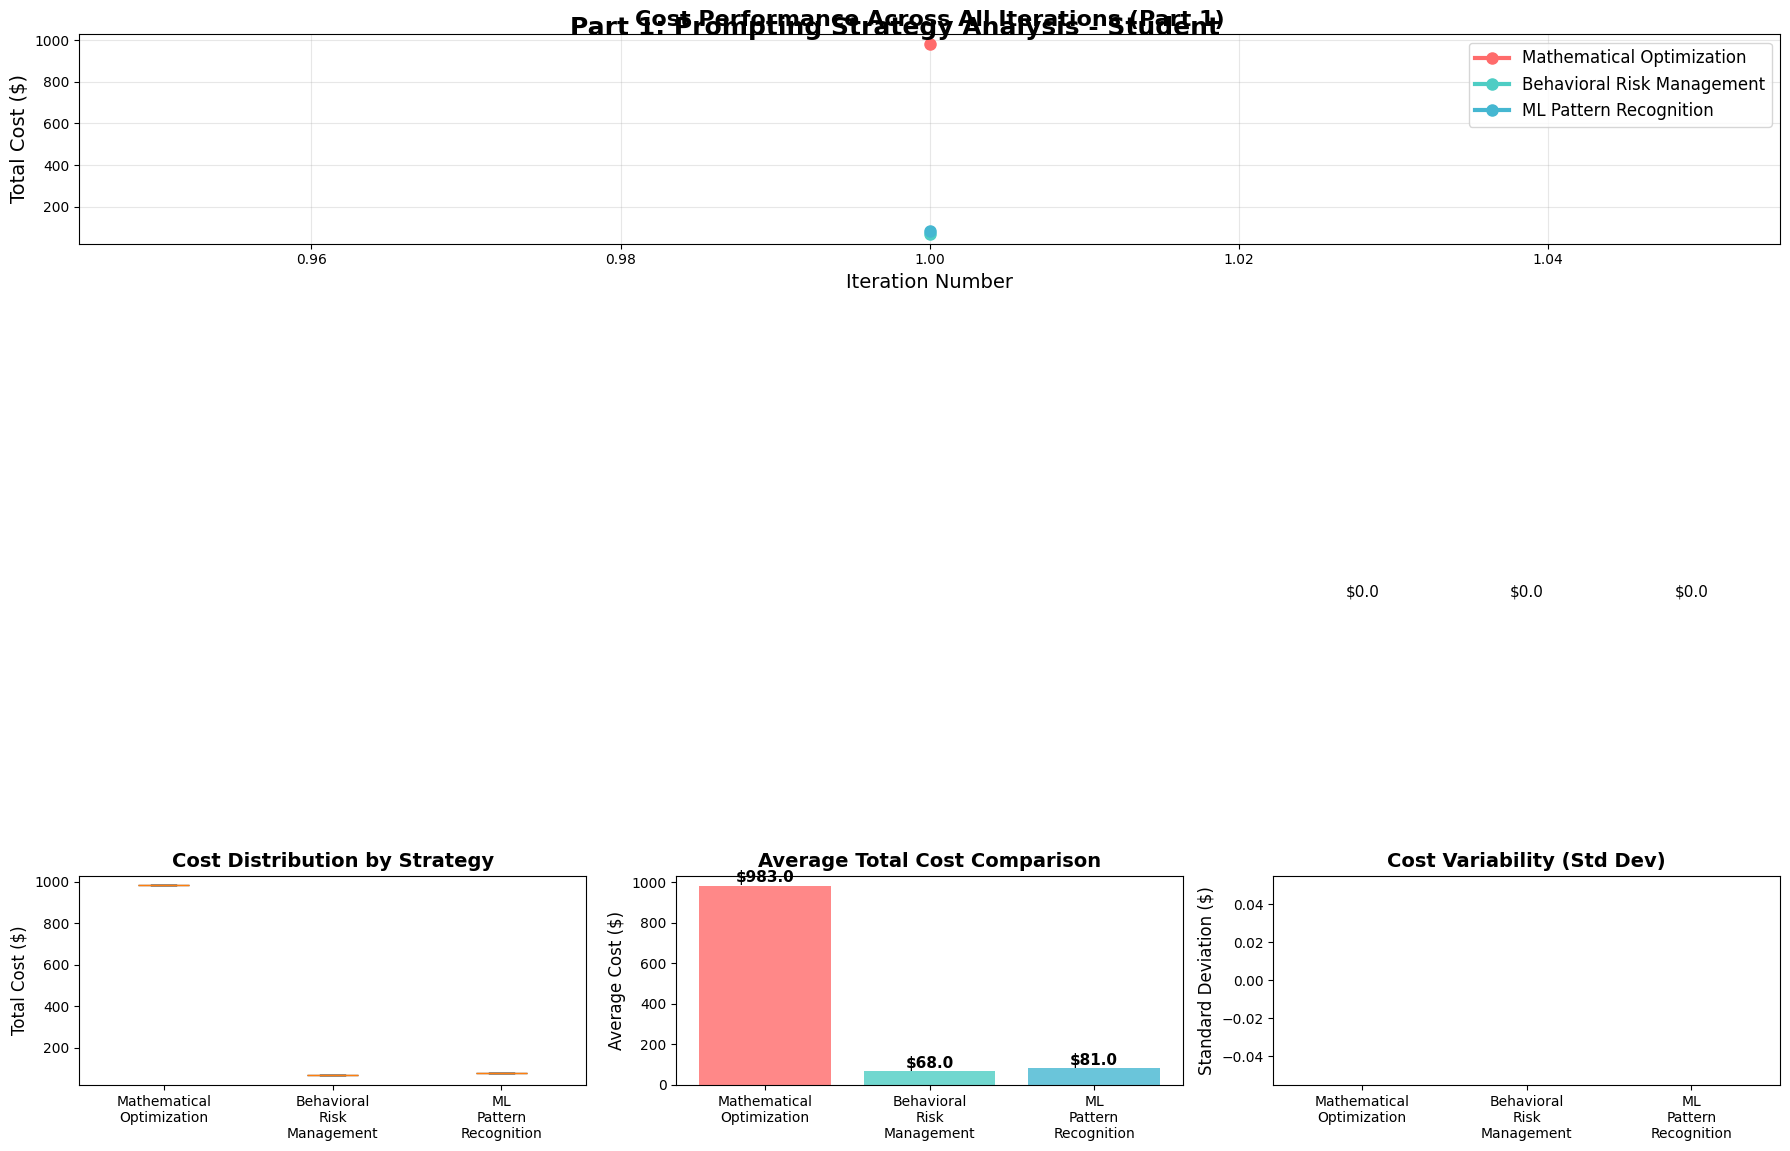

📊 Visualizations created and saved!
💾 Results saved:
   📄 Detailed: Part1_Detailed_Results_Student_20250924_2213.csv
   📄 Summary: Part1_Summary_Student_20250924_2213.csv
   📊 Graph: Part1_Strategy_Analysis_Student.png
   📝 Template: Part1_Report_Template_Student_20250924_2213.txt

✅ PART 1 ASSIGNMENT COMPLETED!
📁 Results saved for report writing


In [51]:
# ==========================================================
# 🎮 Enhanced Beer Game Widget Setup with Strategy Controls
# ==========================================================
# This module provides an enhanced widget interface that works with:
# - Multi-model comparison framework
# - Integrated prompt strategies
# - Part 1 assignment execution
# - Role mapping compatibility
# ==========================================================

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import random

# Set seed for reproducibility
random.seed(42)

# ==========================================================
# 🔧 Role Mapping Compatibility
# ==========================================================

ROLE_MAPPING = {
    'Retailer': 'Retailer',
    'Supplier': 'Wholesaler',
    'Wholesaler': 'Distributor',
    'Manufacturer': 'Factory'
}

def get_mapped_role(ui_role):
    """Maps UI role to simulation role"""
    return ROLE_MAPPING.get(ui_role, ui_role)

# ==========================================================
# 🎛️ Enhanced Widget Controls
# ==========================================================

# Basic simulation parameters
role_input = widgets.Dropdown(
    options=['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'],
    value='Retailer',
    description='Role:',
    style={'description_width': '120px'}
)

demand_input = widgets.Dropdown(
    options=['Market Fluctuation', 'Seasonal Demand'],
    value='Market Fluctuation',
    description='Demand Type:',
    style={'description_width': '120px'}
)

weeks_input = widgets.IntText(
    value=10,
    description='Weeks:',
    min=1,
    max=20,
    style={'description_width': '120px'}
)

name_input = widgets.Text(
    value='Student',
    description='Your Name:',
    style={'description_width': '120px'}
)

approach_input = widgets.Dropdown(
    options=['Manual', 'GenAI-Assisted', 'Full Gen-AI'],
    value='Full Gen-AI',
    description='Approach:',
    style={'description_width': '120px'}
)

# Strategy selection for Full Gen-AI mode
strategy_input = widgets.Dropdown(
    options=[
        ('Original Baseline', 'original'),
        ('Mathematical Optimization', 'mathematical'),
        ('Behavioral Risk Management', 'behavioral'),
        ('ML Pattern Recognition', 'ml_pattern')
    ],
    value='mathematical',
    description='Strategy:',
    style={'description_width': '120px'}
)

# Model selection
model_input = widgets.Dropdown(
    options=[
        ('GPT-4 Turbo (Recommended)', 'gpt-4-turbo'),
        ('GPT-4', 'gpt-4'),
        ('GPT-3.5 Turbo', 'gpt-3.5-turbo')
    ],
    value='gpt-4-turbo',
    description='AI Model:',
    style={'description_width': '120px'}
)

# Assignment mode selector
assignment_mode = widgets.Dropdown(
    options=[
        ('Single Simulation', 'single'),
        ('Part 1: Strategy Testing (3×5 iterations)', 'part1'),
        ('Part 1: With Model Comparison', 'part1_models'),
        ('Part 2: Manual vs GenAI', 'part2'),
        ('Custom Testing', 'custom')
    ],
    value='single',
    description='Mode:',
    style={'description_width': '120px'}
)

# Custom testing parameters
custom_iterations = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    description='Iterations:',
    style={'description_width': '120px'}
)

detailed_summary_checkbox = widgets.Checkbox(
    value=False,
    description='Show detailed weekly summaries',
)

# ==========================================================
# 🎮 Interactive Controls and Display Functions
# ==========================================================

def update_strategy_visibility(*args):
    """Show/hide strategy and model controls based on approach selection"""
    if approach_input.value == 'Full Gen-AI':
        strategy_input.layout.visibility = 'visible'
        model_input.layout.visibility = 'visible'
    else:
        strategy_input.layout.visibility = 'hidden'
        model_input.layout.visibility = 'hidden'

def update_custom_visibility(*args):
    """Show/hide custom parameters based on mode selection"""
    if assignment_mode.value == 'custom':
        custom_iterations.layout.visibility = 'visible'
    else:
        custom_iterations.layout.visibility = 'hidden'

# Set up widget observers
approach_input.observe(update_strategy_visibility, 'value')
assignment_mode.observe(update_custom_visibility, 'value')

# Initial visibility setup
update_strategy_visibility()
update_custom_visibility()

def generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy=None, model=None):
    """Enhanced welcome message with strategy and model info"""

    strategy_info = ""
    if approach == 'Full Gen-AI' and strategy and model:
        strategy_display = {
            'original': 'Original Baseline',
            'mathematical': 'Mathematical Optimization',
            'behavioral': 'Behavioral Risk Management',
            'ml_pattern': 'ML Pattern Recognition'
        }.get(strategy, strategy)

        model_display = {
            'gpt-4-turbo': 'GPT-4 Turbo',
            'gpt-4': 'GPT-4',
            'gpt-3.5-turbo': 'GPT-3.5 Turbo'
        }.get(model, model)

        strategy_info = f"""
        <li><b>AI Strategy:</b> {strategy_display}</li>
        <li><b>AI Model:</b> {model_display}</li>
        """

    mode_info = {
        'single': 'Single Simulation Run',
        'part1': 'Part 1 Assignment (3 strategies × 5 iterations)',
        'part1_models': 'Part 1 with Model Comparison',
        'part2': 'Part 2 Assignment (Manual vs GenAI)',
        'custom': f'Custom Testing ({custom_iterations.value} iterations)'
    }.get(assignment_mode.value, assignment_mode.value)

    message = f"""
    <div style="background-color: #000000; padding: 20px; border-radius: 10px; border: 2px solid #4682b4;">
    <h2 style="color: #2c3e50;">🚀 Welcome, {user_name}!</h2>

    <div style="display: flex; justify-content: space-between;">
        <div style="flex: 1; margin-right: 20px;">
            <h3 style="color: #34495e;">Game Settings:</h3>
            <ul style="list-style-type: none; padding-left: 0;">
                <li><b>Role:</b> {role}</li>
                <li><b>Demand Type:</b> {demand_type}</li>
                <li><b>Simulation Weeks:</b> {weeks}</li>
                <li><b>Approach:</b> {approach}</li>
                {strategy_info}
                <li><b>Execution Mode:</b> {mode_info}</li>
            </ul>
        </div>

        <div style="flex: 1;">
            <h3 style="color: #34495e;">Supply Chain Players:</h3>
            <p style="font-size: 14px; line-height: 1.8;">{players}</p>
        </div>
    </div>

    <div style="margin-top: 15px; padding: 10px; background-color: #e8f4f8; border-radius: 5px;">
        <b>Ready to begin!</b> Click "▶️ Run Simulation" to start.
    </div>
    </div>
    """

    display(HTML(message))

def generate_players(user_name, role):
    """Generate player list with role mapping"""
    fixed_roles = ['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer']
    ai_names = ['AI-Retail', 'AI-Supply', 'AI-Wholesale', 'AI-Manufacture']

    players_flow = []

    for r in fixed_roles:
        if r == role:
            players_flow.append(f"<strong style='color: #e74c3c;'>{user_name}</strong> ({r})")
        else:
            ai_name = ai_names.pop(0)
            players_flow.append(f"<strong style='color: #3498db;'>{ai_name}</strong> ({r})")

    return " ➡️ ".join(players_flow)

# ==========================================================
# 🚀 Enhanced Execution Functions
# ==========================================================

def run_single_simulation():
    """Run a single simulation with current settings"""

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            # Use multi-model version if available
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            # Use basic strategy version
            set_prompting_strategy(strategy_input.value)

    print("🔄 Running single simulation...")
    print(f"Parameters: {role_input.value}, {approach_input.value}, {weeks_input.value} weeks")

    try:
        # Run the simulation
        tables = generate_supply_chain_table_for_all_roles(
            detailed_summary=detailed_summary_checkbox.value
        )

        # Show quick results summary
        if role_input.value in ROLE_MAPPING:
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                print(f"\n✅ Simulation completed!")
                print(f"📊 Final Total Cost: ${final_cost:.2f}")
                print(f"📈 Role: {role_input.value} ({mapped_role})")

        return tables

    except Exception as e:
        print(f"❌ Error in simulation: {e}")
        return None

def execute_assignment_mode():
    """Execute based on selected assignment mode"""

    mode = assignment_mode.value
    user_name = name_input.value

    if mode == 'single':
        return run_single_simulation()

    elif mode == 'part1':
        print("🎓 Starting Part 1 Assignment...")
        try:
            results_df, summary_df = execute_part1_assignment(user_name)
            return results_df, summary_df
        except NameError:
            print("❌ Part 1 execution function not found. Please run the Part 1 framework code first.")
            return None

    elif mode == 'part1_models':
        print("🤖 Starting Enhanced Part 1 with Model Comparison...")
        try:
            results, model_results = execute_part1_with_models(user_name, test_models=True)
            return results, model_results
        except NameError:
            print("❌ Model comparison function not found. Please run the multi-model framework code first.")
            return None

    elif mode == 'part2':
        print("📊 Starting Part 2 Assignment...")
        print("⚠️ Part 2 requires manual input for Manual approach.")
        print("This will run automatically but you'll need to input order quantities when prompted.")
        # You would implement Part 2 execution here
        return run_single_simulation()  # Placeholder

    elif mode == 'custom':
        print(f"🔧 Running custom test with {custom_iterations.value} iterations...")
        return run_custom_test()

    else:
        print(f"❌ Unknown mode: {mode}")
        return None

def run_custom_test():
    """Run custom testing based on current parameters"""

    results = []
    iterations = custom_iterations.value

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            set_prompting_strategy(strategy_input.value)

    print(f"🧪 Running {iterations} custom iterations...")

    for i in range(1, iterations + 1):
        print(f"Iteration {i}/{iterations}: ", end="")

        try:
            tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)

            # Extract results
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                result = {
                    'Iteration': i,
                    'Role': role_input.value,
                    'Approach': approach_input.value,
                    'Strategy': strategy_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Model': model_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Final_Cost': final_cost,
                    'Weeks': weeks_input.value
                }

                results.append(result)
                print(f"${final_cost:.1f}")
            else:
                print("Error - role not found")

        except Exception as e:
            print(f"Error: {str(e)[:30]}")

        time.sleep(1)  # Small delay

    # Show summary
    if results:
        costs = [r['Final_Cost'] for r in results]
        avg_cost = sum(costs) / len(costs)
        print(f"\n📊 Custom Test Summary:")
        print(f"   Average Cost: ${avg_cost:.2f}")
        print(f"   Cost Range: ${min(costs):.2f} - ${max(costs):.2f}")

        # Create simple DataFrame
        import pandas as pd
        results_df = pd.DataFrame(results)
        return results_df

    return None

# ==========================================================
# 🎛️ Main Control Panel
# ==========================================================

# Control buttons
run_button = widgets.Button(
    description="▶️ Run Simulation",
    button_style='success',
    style={'button_color': '#2ecc71'}
)

reset_button = widgets.Button(
    description="🔄 Reset Settings",
    button_style='warning'
)

help_button = widgets.Button(
    description="❓ Help",
    button_style='info'
)

# Button click handlers
def on_run_button_click(b):
    """Handle run button click"""
    clear_output(wait=True)

    # Redisplay the interface
    display_control_panel()

    # Show welcome message
    role = role_input.value
    demand_type = demand_input.value
    weeks = weeks_input.value
    user_name = name_input.value
    approach = approach_input.value
    strategy = strategy_input.value if approach == 'Full Gen-AI' else None
    model = model_input.value if approach == 'Full Gen-AI' else None

    players = generate_players(user_name, role)
    generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy, model)

    # Execute based on mode
    results = execute_assignment_mode()

    return results

def on_reset_button_click(b):
    """Reset all settings to defaults"""
    role_input.value = 'Retailer'
    demand_input.value = 'Market Fluctuation'
    weeks_input.value = 10
    name_input.value = 'Student'
    approach_input.value = 'Full Gen-AI'
    strategy_input.value = 'mathematical'
    model_input.value = 'gpt-4-turbo'
    assignment_mode.value = 'single'
    custom_iterations.value = 3
    detailed_summary_checkbox.value = False
    print("🔄 Settings reset to defaults")

def on_help_button_click(b):
    """Show help information"""
    help_text = """
    <div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 4px solid #007bff;">
    <h3>🔍 Beer Game Simulation Help</h3>

    <p><b>Modes:</b></p>
    <ul>
        <li><b>Single Simulation:</b> Run one simulation with current settings</li>
        <li><b>Part 1:</b> Run assignment Part 1 (3 strategies × 5 iterations = 15 runs)</li>
        <li><b>Part 1 with Models:</b> Enhanced Part 1 with model comparison</li>
        <li><b>Part 2:</b> Manual vs GenAI comparison (requires manual input)</li>
        <li><b>Custom Testing:</b> Custom number of iterations with current settings</li>
    </ul>

    <p><b>Strategies (Full Gen-AI only):</b></p>
    <ul>
        <li><b>Mathematical Optimization:</b> EOQ-based analytical approach</li>
        <li><b>Behavioral Risk Management:</b> Business experience focused</li>
        <li><b>ML Pattern Recognition:</b> Data pattern analysis approach</li>
        <li><b>Original Baseline:</b> Simple optimization prompt</li>
    </ul>

    <p><b>Models:</b> GPT-4 Turbo recommended for best results</p>
    </div>
    """
    display(HTML(help_text))

# Set button click handlers
run_button.on_click(on_run_button_click)
reset_button.on_click(on_reset_button_click)
help_button.on_click(on_help_button_click)

def display_control_panel():
    """Display the complete control panel"""

    # Create organized layout
    basic_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🎮 Basic Settings</h3>"),
        widgets.HBox([role_input, demand_input]),
        widgets.HBox([weeks_input, name_input]),
    ])

    ai_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🤖 AI Settings</h3>"),
        widgets.HBox([approach_input, strategy_input]),
        widgets.HBox([model_input]),
    ])

    execution_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>⚙️ Execution Settings</h3>"),
        widgets.HBox([assignment_mode, custom_iterations]),
        detailed_summary_checkbox
    ])

    button_panel = widgets.HBox([
        run_button, reset_button, help_button
    ])

    # Main layout
    main_panel = widgets.VBox([
        widgets.HTML("<h2 style='color: #ffffff; text-align: center;'>🍺 Beer Game Simulation Control Panel</h2>"),
        widgets.HTML("<hr>"),
        basic_controls,
        ai_controls,
        execution_controls,
        widgets.HTML("<hr>"),
        button_panel
    ])

    display(main_panel)

# ==========================================================
# 🚀 Initialize Control Panel
# ==========================================================

print("🎮 Enhanced Beer Game Widget Setup Loaded!")
print("📋 Features:")
print("  ✓ Multi-strategy support")
print("  ✓ Multi-model comparison")
print("  ✓ Part 1 & Part 2 assignment modes")
print("  ✓ Custom testing capabilities")
print("  ✓ Role mapping compatibility")
print("\n🚀 Run display_control_panel() to show the interface")

# Auto-display the control panel
display_control_panel()

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_improved_part1_visualizations(results_df, summary_df, user_name):
    """
    Creates better visualizations for single-iteration Part 1 results
    """

    valid_results = results_df.dropna(subset=['Final_Total_Cost'])

    if valid_results.empty:
        print("No valid results to visualize!")
        return

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Part 1: AI Prompting Strategy Analysis - {user_name}',
                 fontsize=16, fontweight='bold', y=0.95)

    strategies = valid_results['Strategy'].unique()
    costs = valid_results['Final_Total_Cost'].values
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    # Plot 1: Strategy Performance Comparison (Bar Chart)
    ax1 = axes[0, 0]
    bars = ax1.bar(range(len(strategies)), costs, color=colors, alpha=0.8, width=0.6)

    # Add value labels on bars
    for bar, cost in zip(bars, costs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(costs)*0.02,
                f'${cost:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

    ax1.set_title('Total Cost by Strategy', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Total Cost ($)', fontsize=12)
    ax1.set_xticks(range(len(strategies)))
    ax1.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=10)
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(0, max(costs) * 1.15)

    # Plot 2: Performance Ranking (Horizontal Bar)
    ax2 = axes[0, 1]
    sorted_data = sorted(zip(strategies, costs), key=lambda x: x[1])
    sorted_strategies, sorted_costs = zip(*sorted_data)

    y_pos = np.arange(len(sorted_strategies))
    bars = ax2.barh(y_pos, sorted_costs, color=colors, alpha=0.8)

    # Add value labels
    for bar, cost in zip(bars, sorted_costs):
        width = bar.get_width()
        ax2.text(width + max(sorted_costs)*0.02, bar.get_y() + bar.get_height()/2.,
                f'${cost:.0f}', ha='left', va='center', fontweight='bold')

    ax2.set_title('Strategy Performance Ranking\n(Best to Worst)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Total Cost ($)', fontsize=12)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([s.replace('_', '\n') for s in sorted_strategies], fontsize=10)
    ax2.grid(axis='x', alpha=0.3)

    # Plot 3: Cost Breakdown Analysis (if detailed data available)
    ax3 = axes[1, 0]

    if 'Total_Holding_Cost' in valid_results.columns and 'Total_Backorder_Cost' in valid_results.columns:
        holding_costs = valid_results['Total_Holding_Cost'].values
        backorder_costs = valid_results['Total_Backorder_Cost'].values

        x = np.arange(len(strategies))
        width = 0.35

        bars1 = ax3.bar(x - width/2, holding_costs, width, label='Holding Costs',
                       color='lightblue', alpha=0.8)
        bars2 = ax3.bar(x + width/2, backorder_costs, width, label='Backorder Costs',
                       color='lightcoral', alpha=0.8)

        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax3.text(bar.get_x() + bar.get_width()/2., height + max(max(holding_costs), max(backorder_costs))*0.02,
                            f'{height:.0f}', ha='center', va='bottom', fontsize=9)

        ax3.set_title('Cost Breakdown by Strategy', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Cost ($)', fontsize=12)
        ax3.set_xticks(x)
        ax3.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=10)
        ax3.legend()
        ax3.grid(axis='y', alpha=0.3)
    else:
        # Fallback: Simple cost comparison with percentages
        total_cost = sum(costs)
        percentages = [(cost/total_cost)*100 for cost in costs]

        bars = ax3.bar(range(len(strategies)), percentages, color=colors, alpha=0.8)

        for bar, pct in zip(bars, percentages):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

        ax3.set_title('Cost Distribution (%)', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Percentage of Total Cost', fontsize=12)
        ax3.set_xticks(range(len(strategies)))
        ax3.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=10)
        ax3.grid(axis='y', alpha=0.3)

    # Plot 4: Strategy Comparison Summary
    ax4 = axes[1, 1]

    # Create a summary comparison
    best_strategy = min(zip(strategies, costs), key=lambda x: x[1])
    worst_strategy = max(zip(strategies, costs), key=lambda x: x[1])

    # Performance metrics
    if len(costs) > 1:
        cost_range = max(costs) - min(costs)
        avg_cost = np.mean(costs)
    else:
        cost_range = 0
        avg_cost = costs[0] if len(costs) > 0 else 0

    # Create text summary
    summary_text = f"""STRATEGY PERFORMANCE SUMMARY

Best Performing:
{best_strategy[0].replace('_', ' ')}
Cost: ${best_strategy[1]:.0f}

Worst Performing:
{worst_strategy[0].replace('_', ' ')}
Cost: ${worst_strategy[1]:.0f}

Performance Gap: ${cost_range:.0f}
Average Cost: ${avg_cost:.0f}

Cost Efficiency Ranking:
"""

    # Add ranking
    for i, (strategy, cost) in enumerate(sorted_data, 1):
        summary_text += f"{i}. {strategy.replace('_', ' ')}: ${cost:.0f}\n"

    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('Performance Summary', fontsize=14, fontweight='bold')

    plt.tight_layout()

    # Save the figure
    filename = f'Part1_Strategy_Analysis_{user_name}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"Enhanced visualizations created and saved as {filename}")

    # Print key insights
    print(f"\nKEY INSIGHTS:")
    print(f"- Best strategy: {best_strategy[0].replace('_', ' ')} (${best_strategy[1]:.0f})")
    print(f"- Worst strategy: {worst_strategy[0].replace('_', ' ')} (${worst_strategy[1]:.0f})")
    print(f"- Performance gap: ${cost_range:.0f} ({((cost_range/min(costs))*100):.1f}% difference)")

    if best_strategy[1] < 100:
        print(f"- {best_strategy[0].replace('_', ' ')} shows excellent cost control")

    return fig

def create_single_metric_analysis(results_df, user_name):
    """
    Creates focused analysis for single data points
    """

    if results_df.empty:
        return

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Extract data
    strategies = results_df['Strategy'].tolist()
    costs = results_df['Final_Total_Cost'].tolist()

    # Create enhanced bar chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    bars = ax.bar(range(len(strategies)), costs, color=colors, alpha=0.8, width=0.6)

    # Add value labels and percentage differences
    min_cost = min(costs)
    for i, (bar, cost) in enumerate(zip(bars, costs)):
        height = bar.get_height()

        # Cost label
        ax.text(bar.get_x() + bar.get_width()/2., height + max(costs)*0.02,
                f'${cost:.0f}', ha='center', va='bottom',
                fontweight='bold', fontsize=12)

        # Percentage difference from best
        if cost != min_cost:
            pct_diff = ((cost - min_cost) / min_cost) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    f'+{pct_diff:.0f}%', ha='center', va='center',
                    fontweight='bold', fontsize=10, color='white',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    'BEST', ha='center', va='center',
                    fontweight='bold', fontsize=10, color='white',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='green', alpha=0.7))

    ax.set_title(f'AI Prompting Strategy Performance Comparison - {user_name}',
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Total Cost ($)', fontsize=14)
    ax.set_xticks(range(len(strategies)))
    ax.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, max(costs) * 1.2)

    # Add annotation box with key findings
    best_idx = costs.index(min(costs))
    worst_idx = costs.index(max(costs))

    annotation = f"""Key Findings:
• Best: {strategies[best_idx].replace('_', ' ')} (${costs[best_idx]})
• Worst: {strategies[worst_idx].replace('_', ' ')} (${costs[worst_idx]})
• Gap: ${max(costs) - min(costs)} ({((max(costs)-min(costs))/min(costs)*100):.0f}%)"""

    ax.text(0.98, 0.98, annotation, transform=ax.transAxes,
            fontsize=11, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

    plt.tight_layout()

    filename = f'Part1_Single_Analysis_{user_name}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"Single metric analysis saved as {filename}")

    return fig

# Usage example:
print("Enhanced Part 1 visualization functions ready!")
print("\nTo use with your data:")
print("create_improved_part1_visualizations(results_df, summary_df, 'Student')")
print("create_single_metric_analysis(results_df, 'Student')")

Enhanced Part 1 visualization functions ready!

To use with your data:
create_improved_part1_visualizations(results_df, summary_df, 'Student')
create_single_metric_analysis(results_df, 'Student')


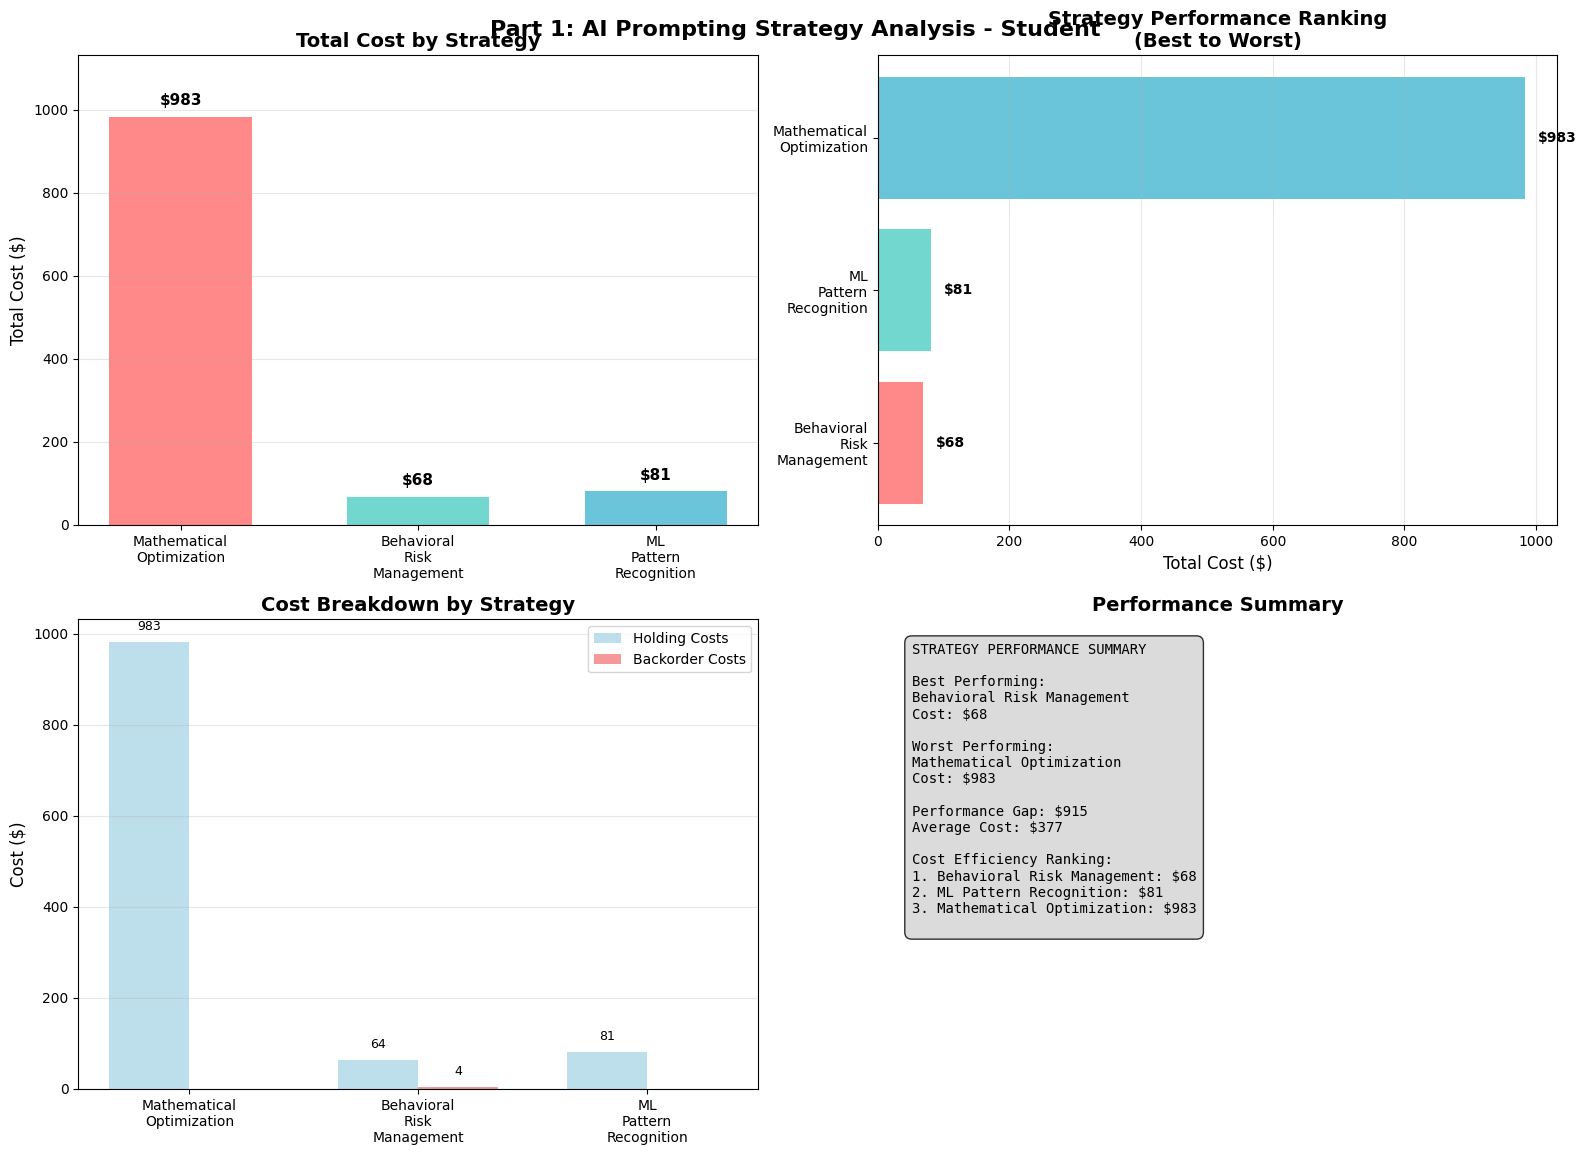

Enhanced visualizations created and saved as Part1_Strategy_Analysis_Student.png

KEY INSIGHTS:
- Best strategy: Behavioral Risk Management ($68)
- Worst strategy: Mathematical Optimization ($983)
- Performance gap: $915 (1345.6% difference)
- Behavioral Risk Management shows excellent cost control


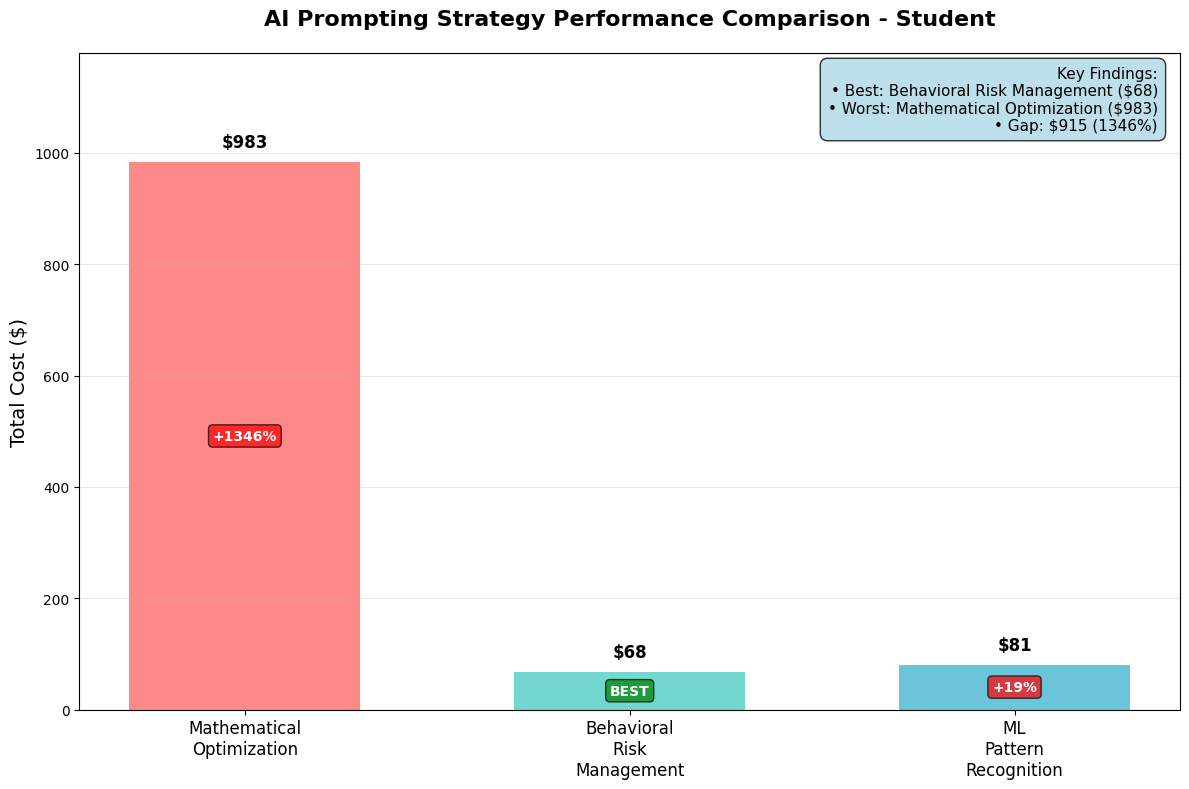

Single metric analysis saved as Part1_Single_Analysis_Student.png


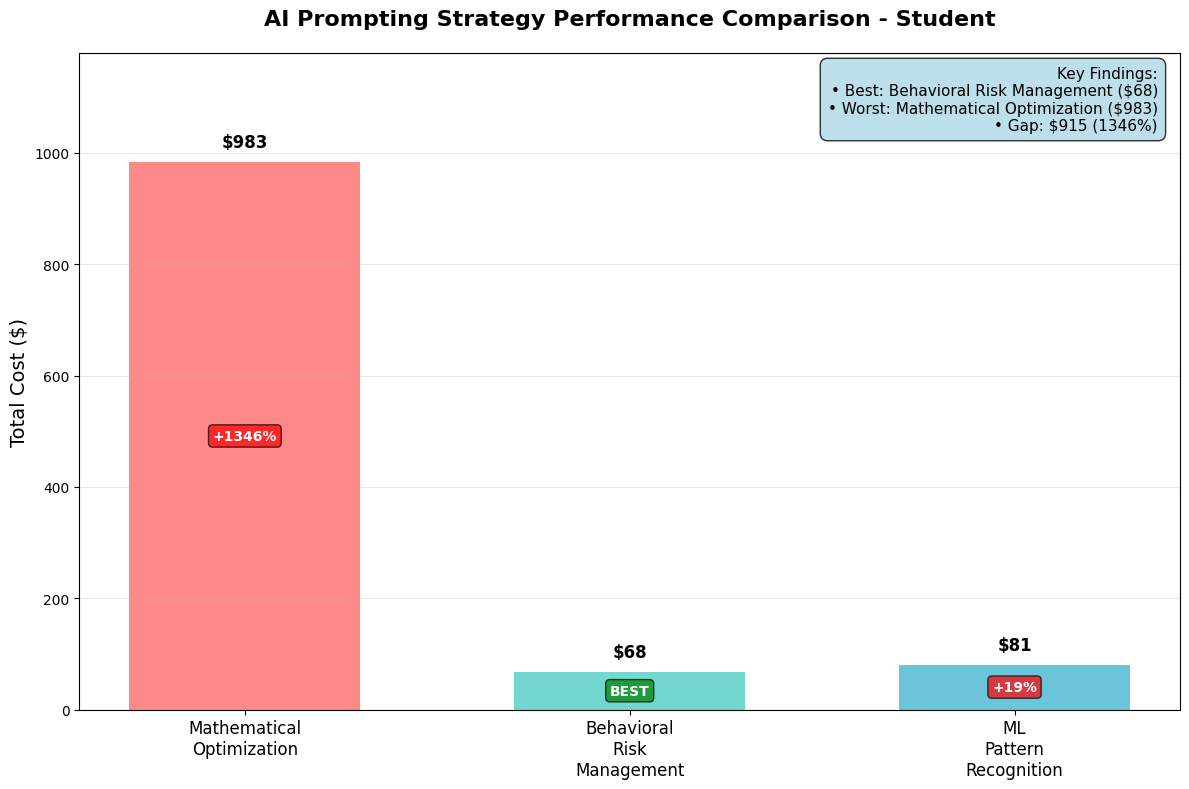

In [55]:
# Read your saved CSV files
results_df = pd.read_csv('Part1_Detailed_Results_Student_20250924_2213.csv')
summary_df = pd.read_csv('Part1_Summary_Student_20250924_2213.csv')

# Create improved visualizations
create_improved_part1_visualizations(results_df, summary_df, 'Student')

# Or create the focused single analysis
create_single_metric_analysis(results_df, 'Student')